In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Values and file operations as given in Makedataset.py

time = 10 # we perform sampling for 10s
offset = 100 # we selct samples from 100th position of csv file
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"] #name of activity folders
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined") # Store path to Combined folder containing Train and Test Datasets.

In [3]:
# Now we obtain train datasets to perform EDA.

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train") # obtaining path to Train dataset

for folder in folders: # for each activity folder in Train
    files = os.listdir(os.path.join(dataset_dir,folder)) # we obtain a list of csv files in each activity folder

    for file in files: # for each subject csv file in the activity folder

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0) # we store its data in Dataframe df.
        df = df[offset:offset+time*50] # we store on 500 records starting from 100 to 600
        X_train.append(df.values) # we append values to X_train 
        y_train.append(classes[folder]) ## we append values to y_train 
# we convert the data series to numpy array
X_train = np.array(X_train) 
y_train = np.array(y_train)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

from sklearn.model_selection import train_test_split

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=seed)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
# print("Validation data shape: ",X_val.shape)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [4]:
X_train

array([[[ 1.007544  , -0.1637979 , -0.1496132 ],
        [ 1.009979  , -0.161686  , -0.1536227 ],
        [ 1.01008   , -0.160879  , -0.1589772 ],
        ...,
        [ 1.002052  , -0.1727968 , -0.1738661 ],
        [ 1.002875  , -0.1738667 , -0.1729062 ],
        [ 1.001078  , -0.1738621 , -0.1744945 ]],

       [[ 0.9100345 , -0.09837841,  0.2526748 ],
        [ 0.8547794 , -0.1036736 ,  0.2466994 ],
        [ 0.8448371 , -0.1162746 ,  0.233289  ],
        ...,
        [ 0.385755  , -0.258573  ,  0.1717271 ],
        [ 0.5271969 , -0.2313261 ,  0.1711758 ],
        [ 0.5528433 , -0.2209706 ,  0.1948508 ]],

       [[ 1.015056  , -0.03396467,  0.1354992 ],
        [ 1.011082  , -0.0325952 ,  0.1431367 ],
        [ 1.014167  , -0.03133387,  0.1503816 ],
        ...,
        [ 1.012933  , -0.03234481,  0.1501941 ],
        [ 1.012485  , -0.03568829,  0.1518454 ],
        [ 1.011004  , -0.03656625,  0.1570806 ]],

       ...,

       [[ 0.0365117 ,  0.7822584 ,  0.6494456 ],
        [ 0

In [5]:
X_train.shape #126 windows with each having 500 rows and 3 columns

(126, 500, 3)

In [6]:
y_train 

array([5, 3, 5, 1, 5, 4, 1, 3, 2, 1, 4, 3, 4, 3, 1, 5, 6, 6, 4, 2, 6, 4,
       3, 6, 3, 6, 2, 6, 6, 4, 1, 1, 5, 2, 4, 4, 4, 4, 4, 4, 5, 1, 1, 3,
       4, 2, 3, 6, 2, 3, 5, 3, 4, 3, 5, 1, 4, 5, 4, 4, 5, 2, 2, 2, 2, 5,
       6, 3, 6, 3, 5, 4, 1, 1, 4, 6, 2, 3, 1, 1, 3, 3, 6, 6, 5, 1, 6, 6,
       1, 1, 6, 5, 3, 1, 5, 2, 5, 2, 5, 5, 3, 4, 5, 2, 6, 4, 1, 3, 6, 5,
       5, 6, 5, 3, 3, 2, 3, 1, 2, 2, 6, 1, 2, 6, 3, 3])

In [7]:
y_train.shape # contain activity code for each window 

(126,)

In [8]:
activity_dictionary={1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}

# Task 1:

## Question 1:

### Plot the waveform for one sample data from each activity class.

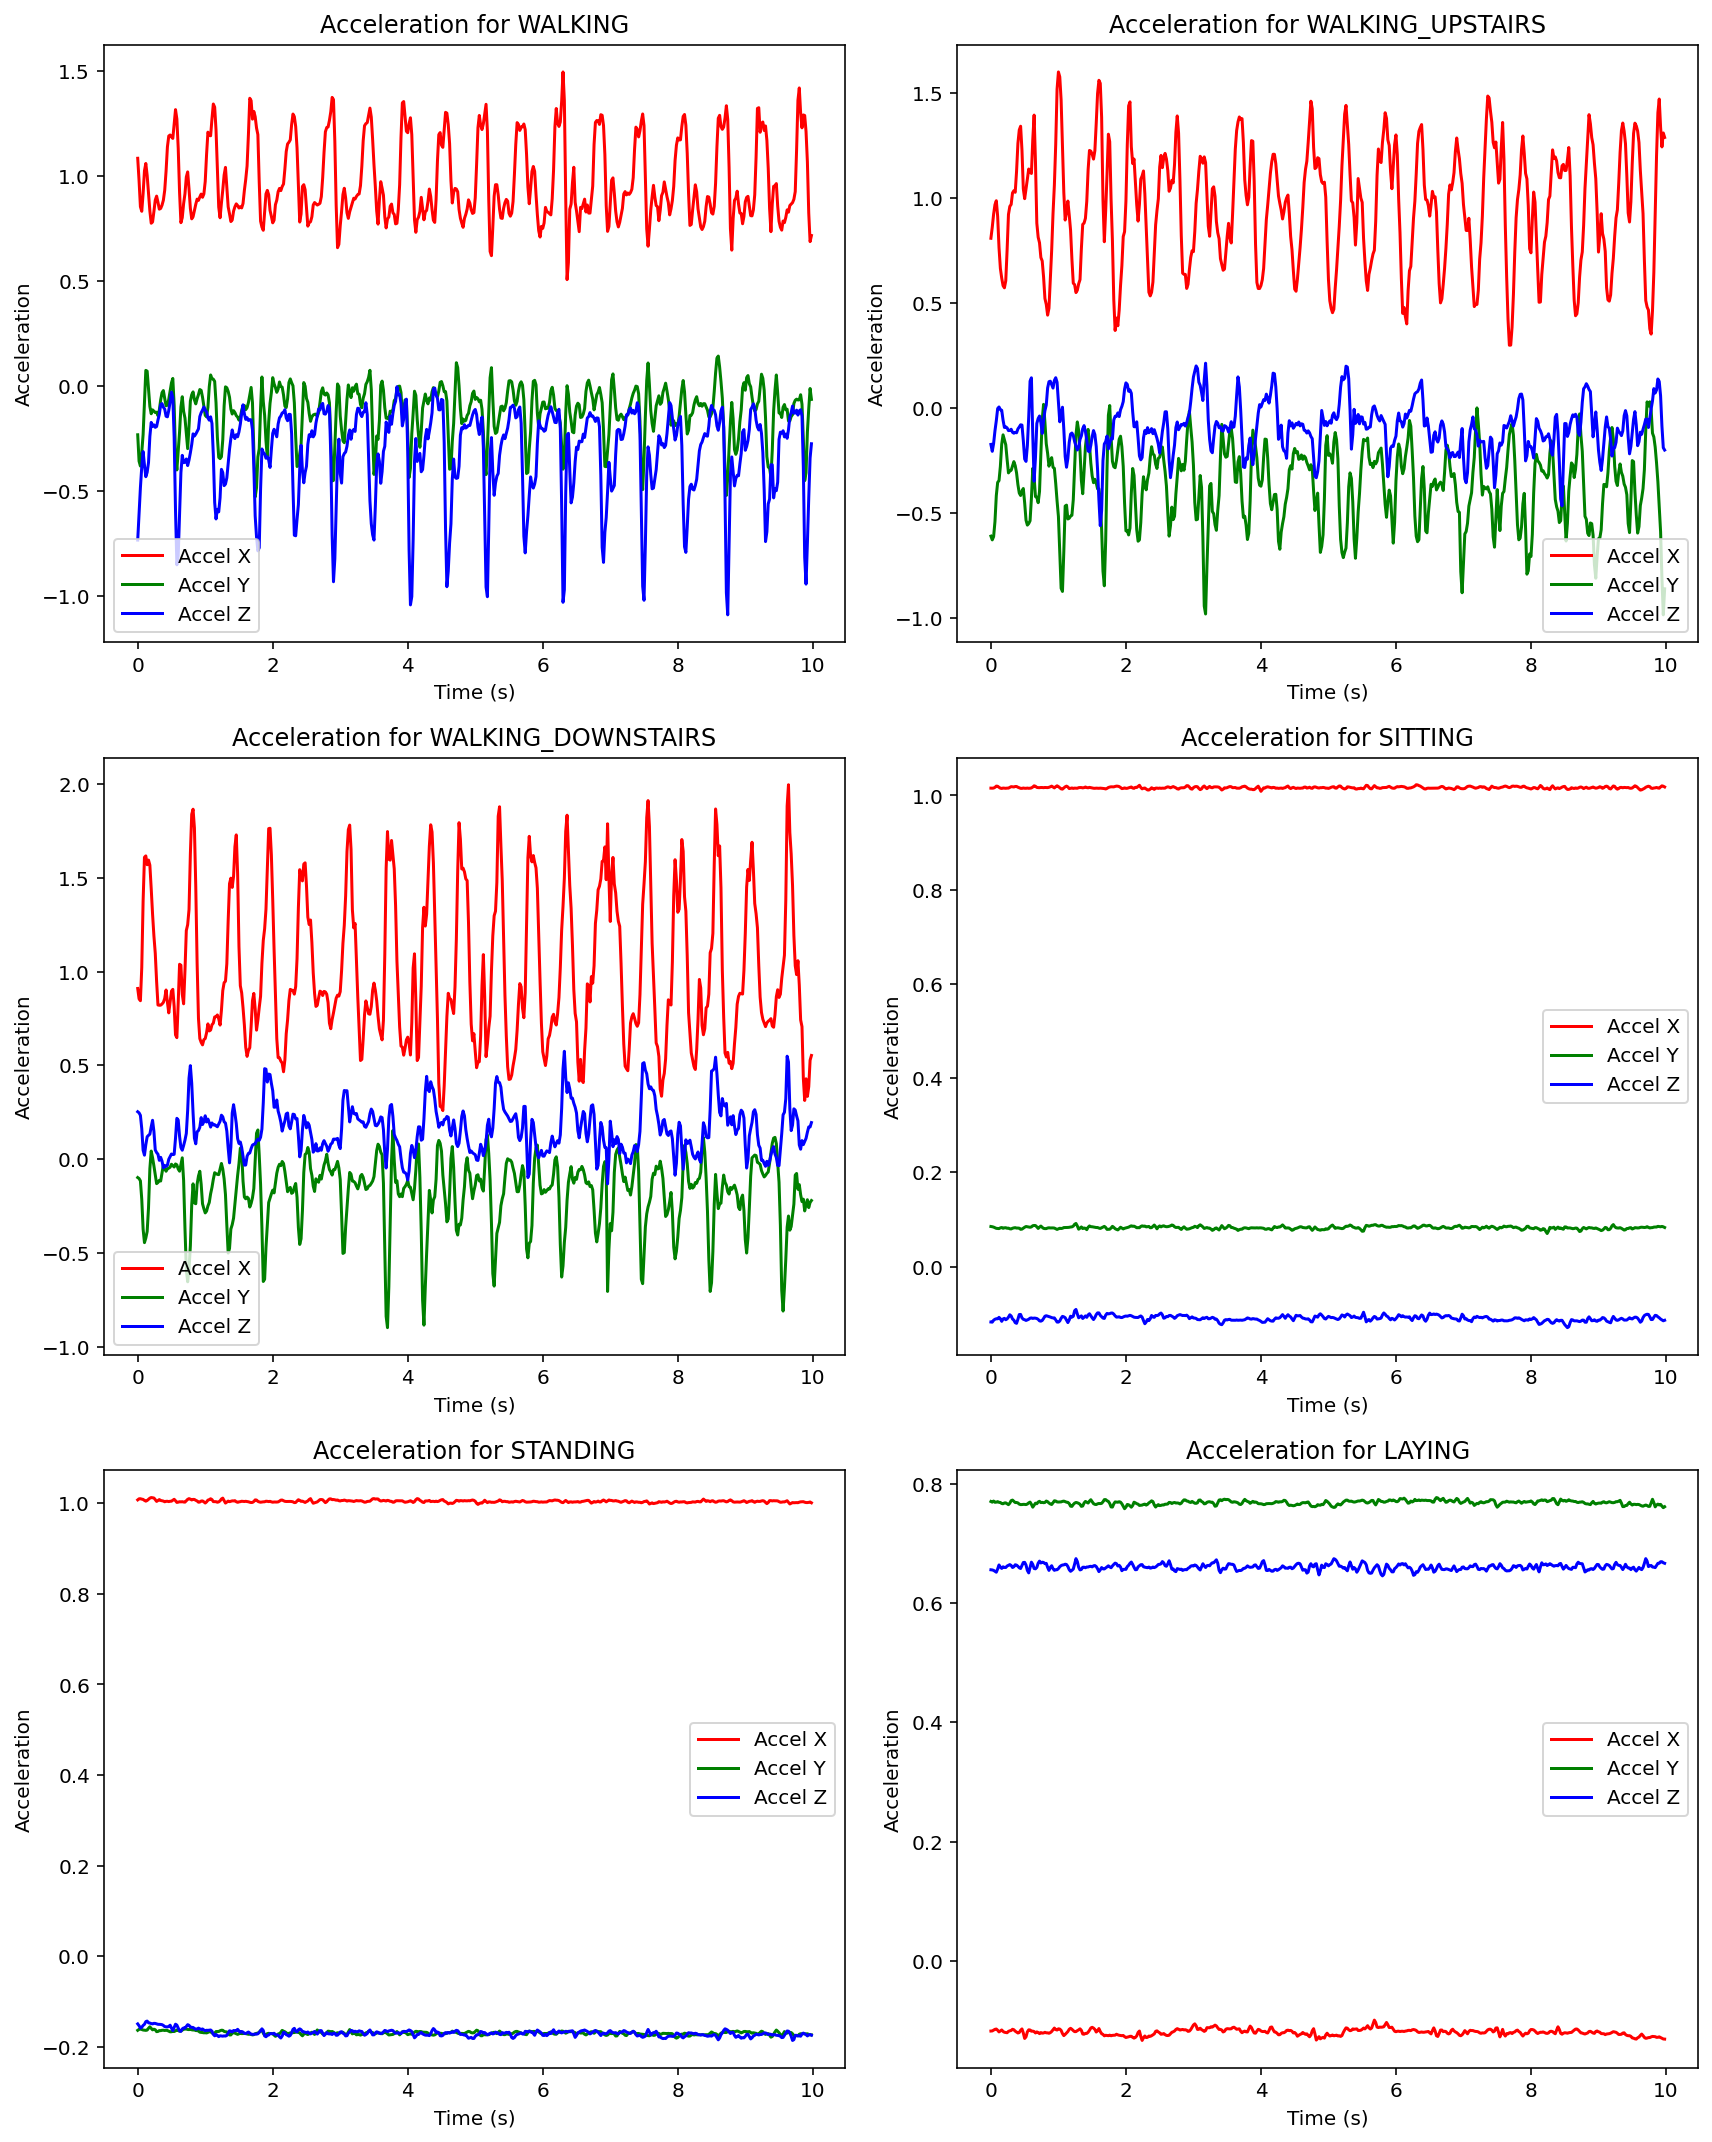

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

for act_code in activity_dictionary.keys():
    matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
    if matching_indices.size > 0:
    
        window_index=matching_indices[0]
        X_train_window=X_train[window_index,:,:]
        accel_x=X_train_window[:,0]
        accel_y=X_train_window[:,1]
        accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
        x=np.arange(0,10,0.02)#considering 1st 10s with sampling frequency of 50Hz
        ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
        ax.plot(x, accel_x, label='Accel X', color='r')
        ax.plot(x, accel_y, label='Accel Y', color='g')
        ax.plot(x, accel_z, label='Accel Z', color='b')
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Acceleration")
        ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        ax.legend()
    else:
        print("true")
        
plt.tight_layout()
plt.show()


Acceleration in the X, Y, and Z directions refer to acceleration in relation to a device's orientation.
The X, Y, and Z axes are the three axes of a device's orientation. For example, on a smartphone, the X axis is forward, the Y axis is sideways, and the Z axis is downward.

### Are you able to see any difference/similarities between the activities?

Activities such as "walking" and "walking_upstairs", "walking_downstairs" have more dynamic and oscillatory waveforms compared to "sitting", "standing" or "lying", which are more stable or flat. These differences suggest that different activities produce distinct patterns in the sensor readings.

### Do you think the model will be able to classify the activities based on the data?

Given these distinct patterns, a machine learning model, especially one designed for time series classification, should be able to learn these patterns and effectively classify the activities based on the sensor data.

##  Question 2:

### Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration for each activity and justify your answer. 

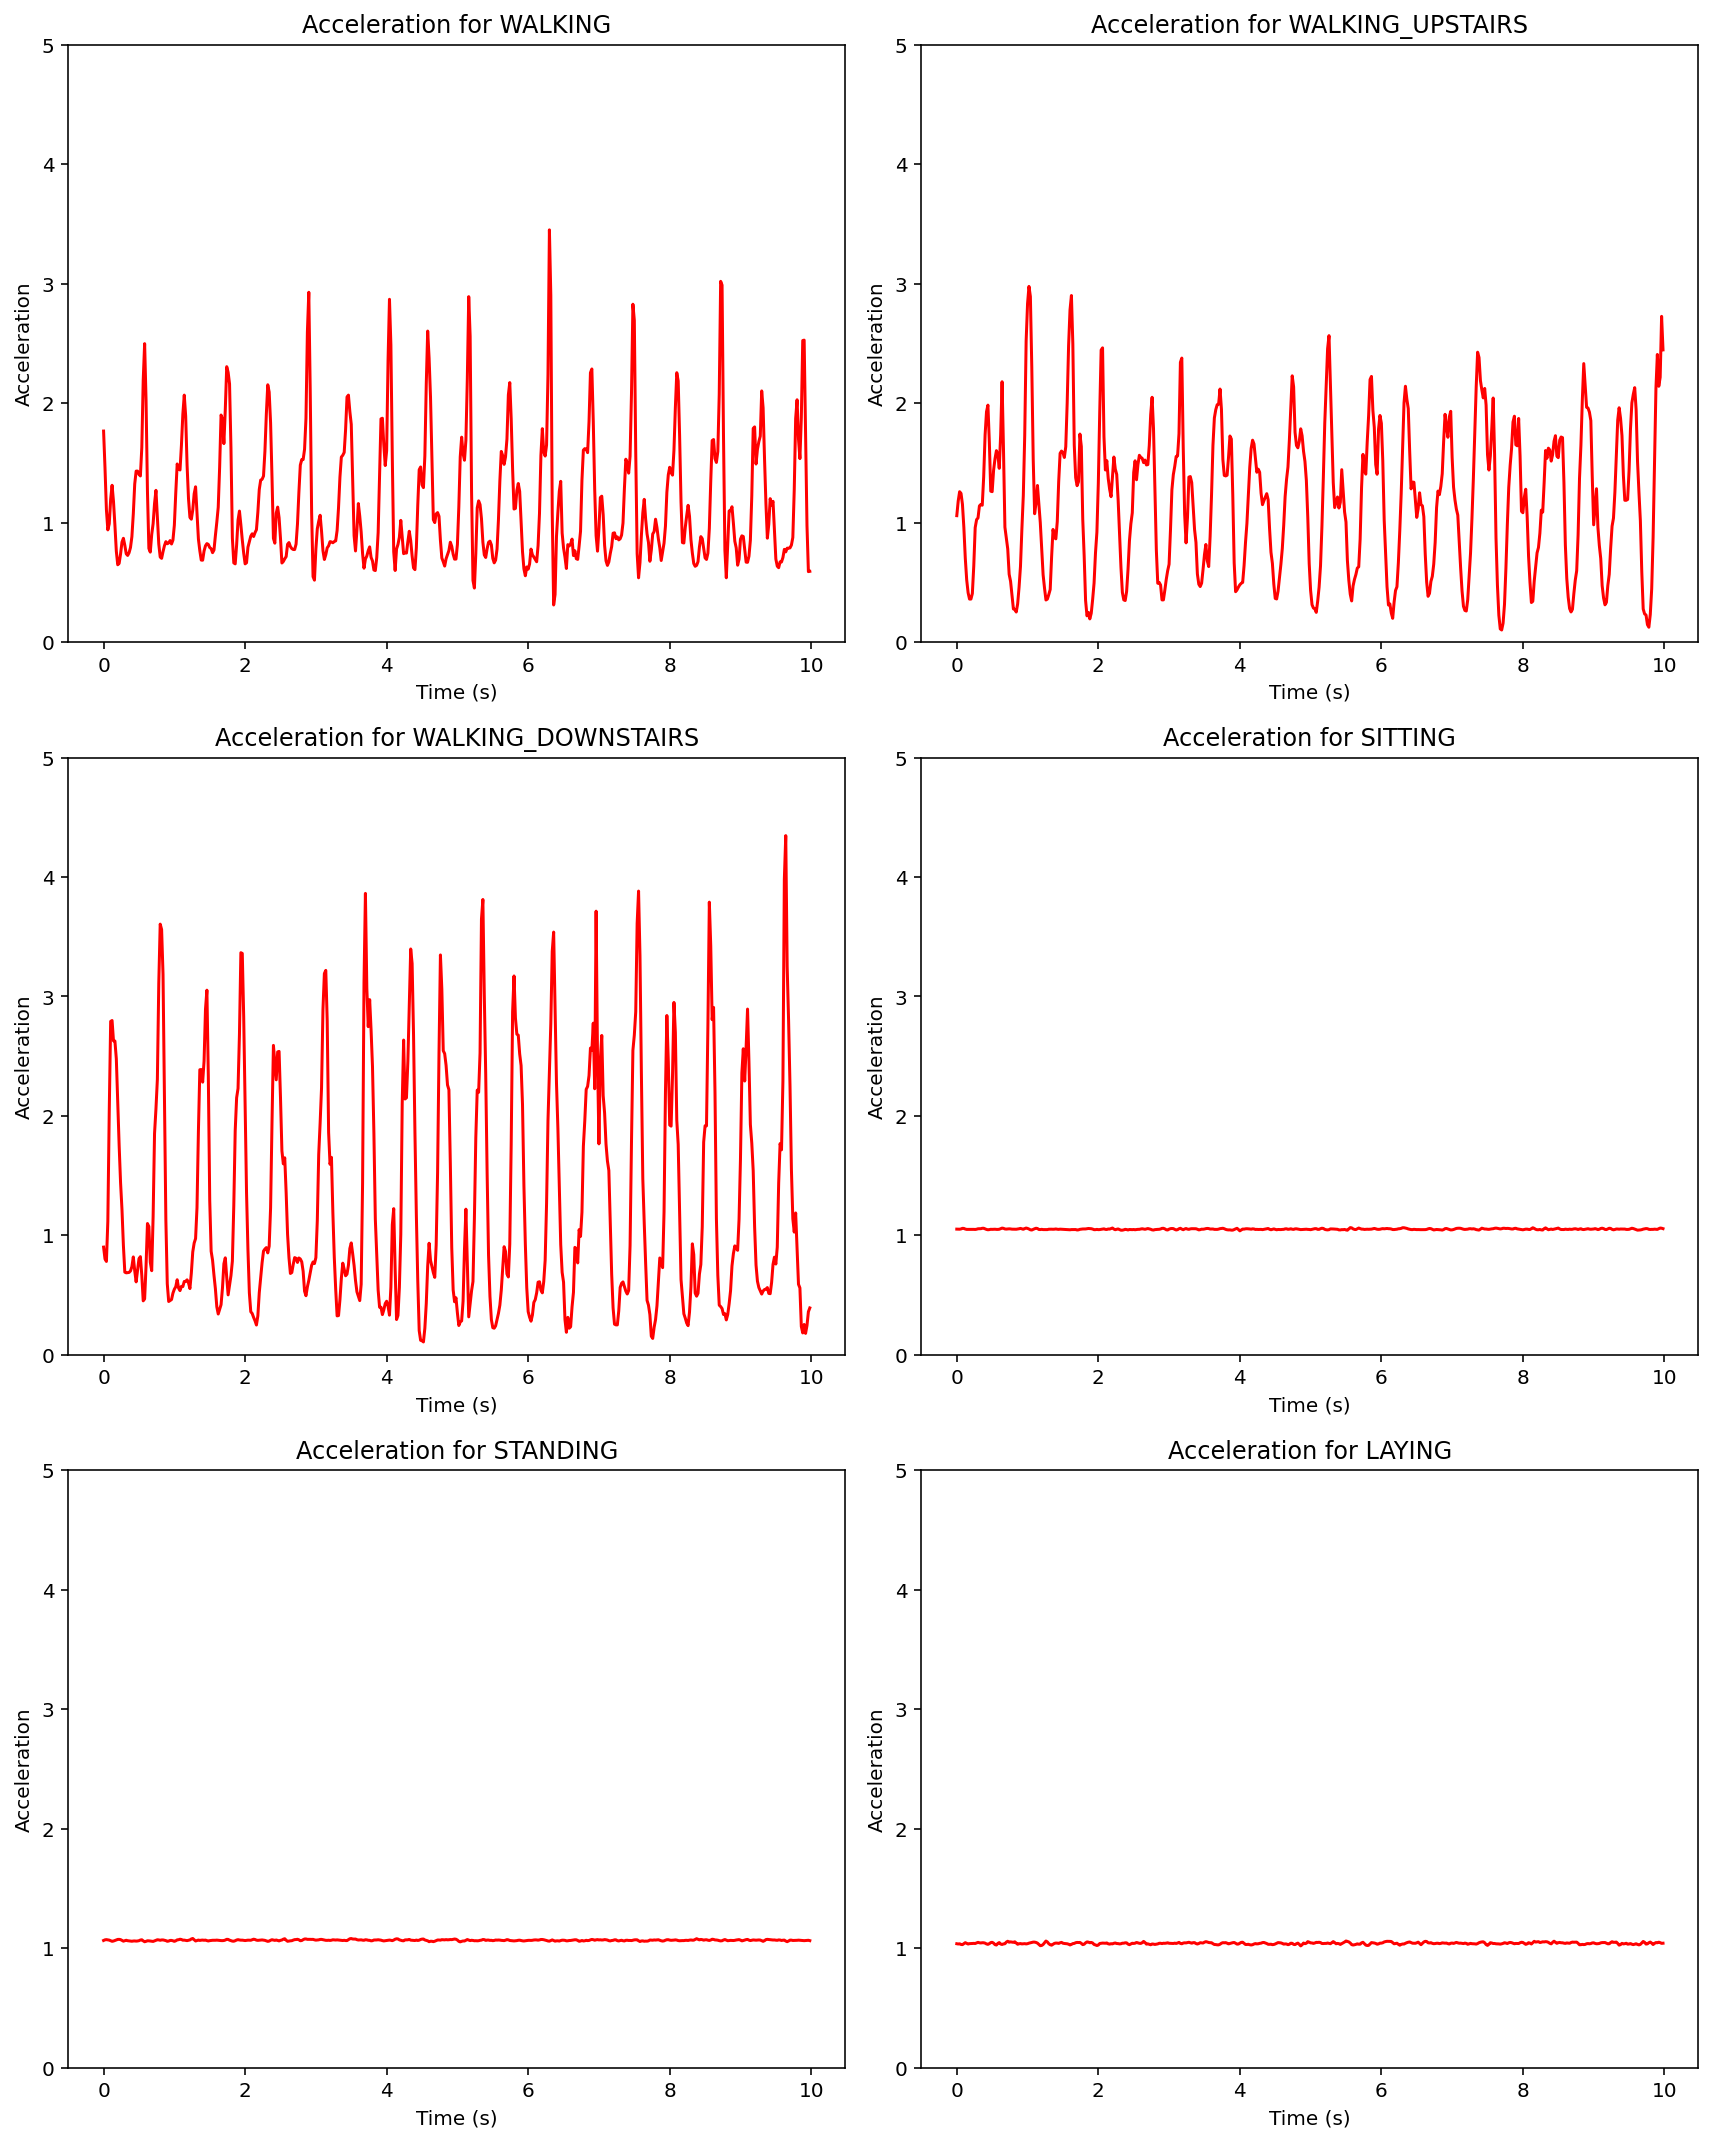

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()
plt.setp(axes, ylim=(0,5))
for act_code in activity_dictionary.keys():
        matching_indices=np.where(y_train==act_code)[0]#we get tuple so we obtain first one by indexing 
    
        if matching_indices.size > 0:

            window_index=matching_indices[0]
            X_train_window=X_train[window_index,:,:]
            accel_x=X_train_window[:,0]
            accel_y=X_train_window[:,1]
            accel_z=X_train_window[:,2]# from the window we obtain full rows of 0th, 1st and 2nd column
            accel_net_sqr = accel_x**2 + accel_y**2 +accel_z**2
            x=np.arange(0,10,0.02)#considering 1st 10s with sampling frequency of 50Hz
            ax = axes[act_code - 1]  # Adjusting index since keys are 1-based
            ax.plot(x, accel_net_sqr, color='r')
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Acceleration")
            ax.set_title(f'Acceleration for {activity_dictionary[act_code]}')
        else:
            print("true")
plt.tight_layout()
plt.show()


As the linear acceleration data shows clear and consistent patterns that can be easily distinguished visually (e.g., dynamic activities have high variance and oscillations, while static activities are flat and stable), a simple threshold-based or rule-based approach might suffice for classification.
However, if there is overlap or noise in the data, or if the patterns are not easily distinguishable, a machine learning model would be beneficial to capture subtle variations and complex relationships in the data.

Here, we see clear differences between static and dynamic activities, so a simple model might be enough for this particular classification. However, a machine learning model could still be beneficial for more nuanced classification tasks, such as distinguishing between similar dynamic activities like walking and running.

## Question 3:

## Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

In [11]:
X_train.shape

(126, 500, 3)

In [12]:
df_of_X_train = pd.DataFrame(X_train.reshape(X_train.shape[1]*X_train.shape[0],X_train.shape[2]), columns=['acc_x', 'acc_y', 'acc_z'])
df_of_X_train.describe()

acc_x         acc_y         acc_z
count  63000.000000  63000.000000  63000.000000
mean       0.821215      0.025841      0.109919
std        0.406690      0.383822      0.332131
min       -0.394386     -1.371525     -1.269419
25%        0.712531     -0.204344     -0.106256
50%        0.934854     -0.081716      0.078899
75%        1.018450      0.196225      0.252877
max        2.083785      1.069938      1.037550

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
df_of_X_train['total_accel']=df_of_X_train['acc_x']**2 + df_of_X_train['acc_y']**2 + df_of_X_train['acc_z']**2
print(df_of_X_train.shape)

(63000, 4)


In [15]:
#Scaling the data to avoid skewness.. Required for PCA
##Use StandardScaler to normalize the acceleration data (X, Y, Z) 
##so that the feature has a mean of 0 and a standard deviation of 1.
##Standardize the Total Acceleration
scaler = StandardScaler()
df_of_X_train['total_acc_standardized'] = scaler.fit_transform(df_of_X_train[['total_accel']])
print(df_of_X_train.shape)
df_of_X_train.describe()

(63000, 5)


acc_x         acc_y         acc_z   total_accel  \
count  63000.000000  63000.000000  63000.000000  63000.000000   
mean       0.821215      0.025841      0.109919      1.110164   
std        0.406690      0.383822      0.332131      0.505662   
min       -0.394386     -1.371525     -1.269419      0.051016   
25%        0.712531     -0.204344     -0.106256      0.974346   
50%        0.934854     -0.081716      0.078899      1.035204   
75%        1.018450      0.196225      0.252877      1.073796   
max        2.083785      1.069938      1.037550      5.839623   

       total_acc_standardized  
count            6.300000e+04  
mean            -3.645197e-16  
std              1.000008e+00  
min             -2.094593e+00  
25%             -2.685973e-01  
50%             -1.482435e-01  
75%             -7.192182e-02  
max              9.353076e+00

In [16]:
#Applying PCA on scaled data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_of_X_train[[ 'acc_x', 'acc_y', 'acc_z','total_acc_standardized',]])

PCA Components(Principal Axes in Feature Space):
      acc_x     acc_y     acc_z  total_acc_standardized
0  0.254410 -0.132839 -0.083736                0.954263
1 -0.498867  0.644435  0.513922                0.267806


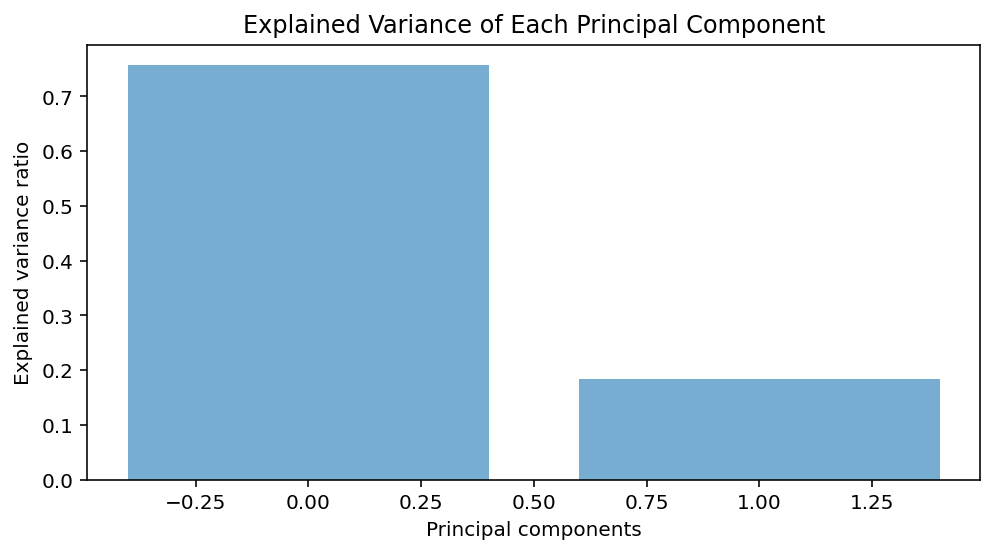

In [17]:
# Visualizing PCA features...
components = pca.components_
explained_variance = pca.explained_variance_ratio_
component_df = pd.DataFrame(components, columns=['acc_x', 'acc_y', 'acc_z','total_acc_standardized',])  # Replace with actual feature names
print("PCA Components(Principal Axes in Feature Space):")
print(component_df)
plt.figure(figsize=(8, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.6, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance of Each Principal Component')
plt.show()

In [18]:
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_df['activity'] = np.repeat(y_train, 500)
pca_df.shape
#Reducing the number of points for visualization, otherwise it leads to too much clustering..
sampled_pca_df = pca_df.sample(n=50, random_state=42)

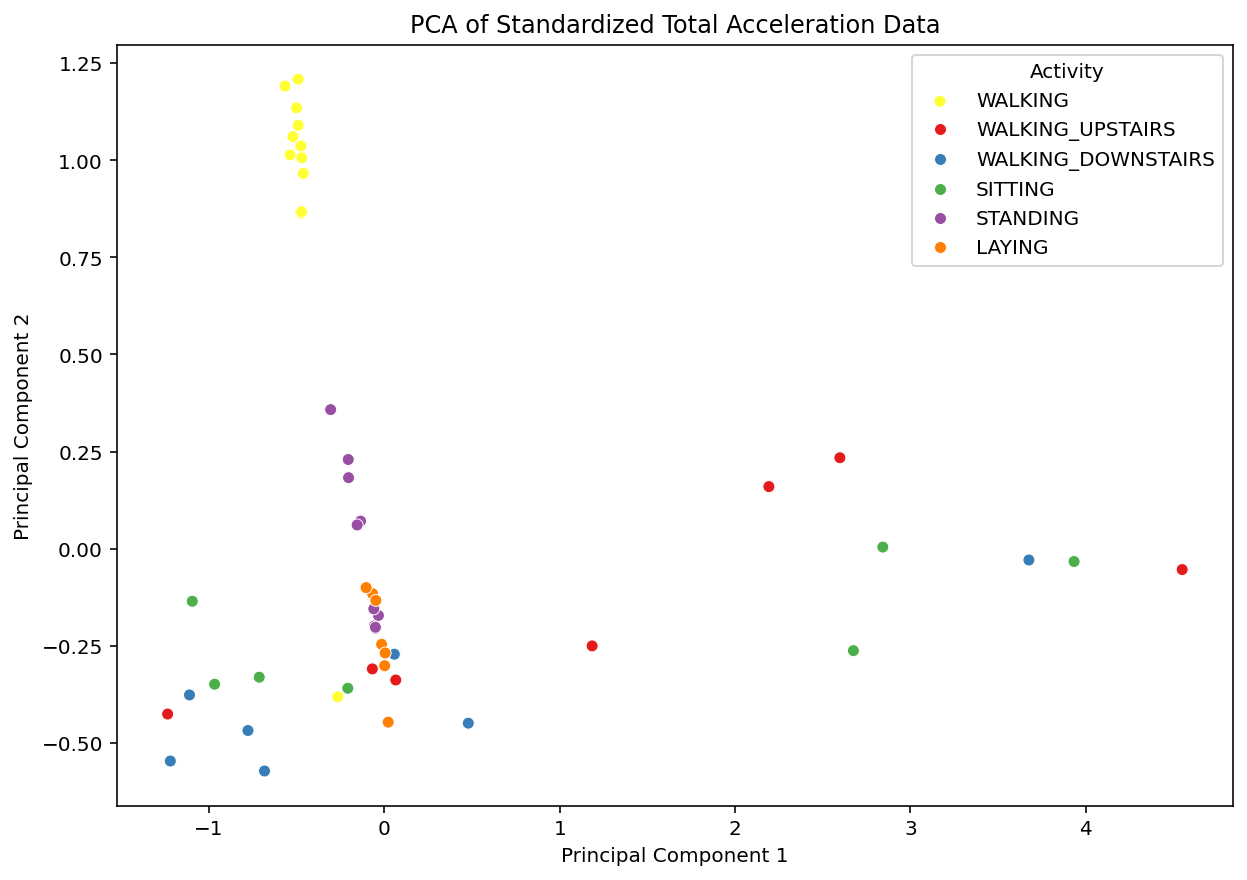

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='activity', data=sampled_pca_df, palette='Set1')
plt.title('PCA of Standardized Total Acceleration Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity', loc='best', labels=classes)
plt.show()

Clusters: If the activities form distinct clusters in the scatter plot, it suggests that the PCA has effectively captured the variance in the data and compressed it into two features that retain meaningful information about the different activities.

Overlap: If there is significant overlap between some activities, it indicates that these activities have similar acceleration patterns, making them harder to distinguish using only two principal components. 

Hence we need more advanced machine learning techniques or additional features for better classification.

Here, as we can see from the scatter plot, we can easily classify "walking" using the two principle components, but for other activities we have more overlapping clusters.

### Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [20]:
import tsfel
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_tsfel_features_list = []
cfg = tsfel.get_features_by_domain("statistical")

for i in range(X_train.shape[0]):
    
    train_data_window_for_tsfel = pd.DataFrame(X_train[i], columns=['acc_x', 'acc_y', 'acc_z'])

    features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)
    features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)
    features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)
    
    features = pd.concat([features_x, features_y, features_z], axis=1)
    
    train_tsfel_features_list.append(features)

train_tsfel_features_df = pd.concat(train_tsfel_features_list, ignore_index=True)

*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-20-e366f1904e96>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, train_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***


In [21]:
#Standardization and PCA
from sklearn.decomposition import PCA

scaler = StandardScaler()
train_standardized_tsfel_features = scaler.fit_transform(train_tsfel_features_df)

print(train_standardized_tsfel_features.shape)
print("TSFEL Features are: \n", train_standardized_tsfel_features)

pca_tsfel=PCA(n_components=2)
pca_tsfel.fit(train_standardized_tsfel_features)
x_pca_tsfel=pca_tsfel.transform(train_standardized_tsfel_features)

pca_df_tsfel = pd.DataFrame(data=x_pca_tsfel, columns=['PCA1', 'PCA2'])
pca_df_tsfel['activity'] = y_train 

print("\n PCA after TSFEL: \n" ,pca_df_tsfel)
pca_df_tsfel.describe()

(126, 120)
TSFEL Features are: 
 [[ 0.43816594  0.43816594  0.         ...  1.41805936 -1.00649626
  -0.74965675]
 [ 0.86424528  0.86424528  0.         ...  1.02886884  0.68167596
   0.32873102]
 [ 0.49427587  0.49427587  0.         ...  1.04812057 -0.9597069
  -0.74587803]
 ...
 [-2.17490613 -2.17490613  0.         ...  0.45851362 -1.04049207
  -0.75146856]
 [ 0.8801456   0.8801456   0.         ...  0.11434447  0.684067
   0.33163264]
 [ 0.98234082  0.98234082  0.         ... -0.13479041  0.09946543
  -0.26209045]]

 PCA after TSFEL: 
           PCA1      PCA2  activity
0     0.162256 -5.620850         5
1    -4.732863  2.349074         3
2     1.193424 -5.060089         5
3    -4.801609  1.385433         1
4     0.677064 -6.039086         5
..         ...       ...       ...
121  -4.611794  1.786166         1
122  -3.675175  1.761850         2
123  10.996878  3.842525         6
124  -5.659416  3.395655         3
125  -5.944893  2.942759         3

[126 rows x 3 columns]


PCA1          PCA2    activity
count  1.260000e+02  1.260000e+02  126.000000
mean   1.903239e-16  8.811294e-17    3.555556
std    5.459526e+00  3.654959e+00    1.690233
min   -7.011875e+00 -6.039086e+00    1.000000
25%   -4.513703e+00 -3.412602e+00    2.000000
50%   -7.523142e-01  7.144763e-01    4.000000
75%    2.587179e+00  2.558862e+00    5.000000
max    1.200913e+01  1.832356e+01    6.000000

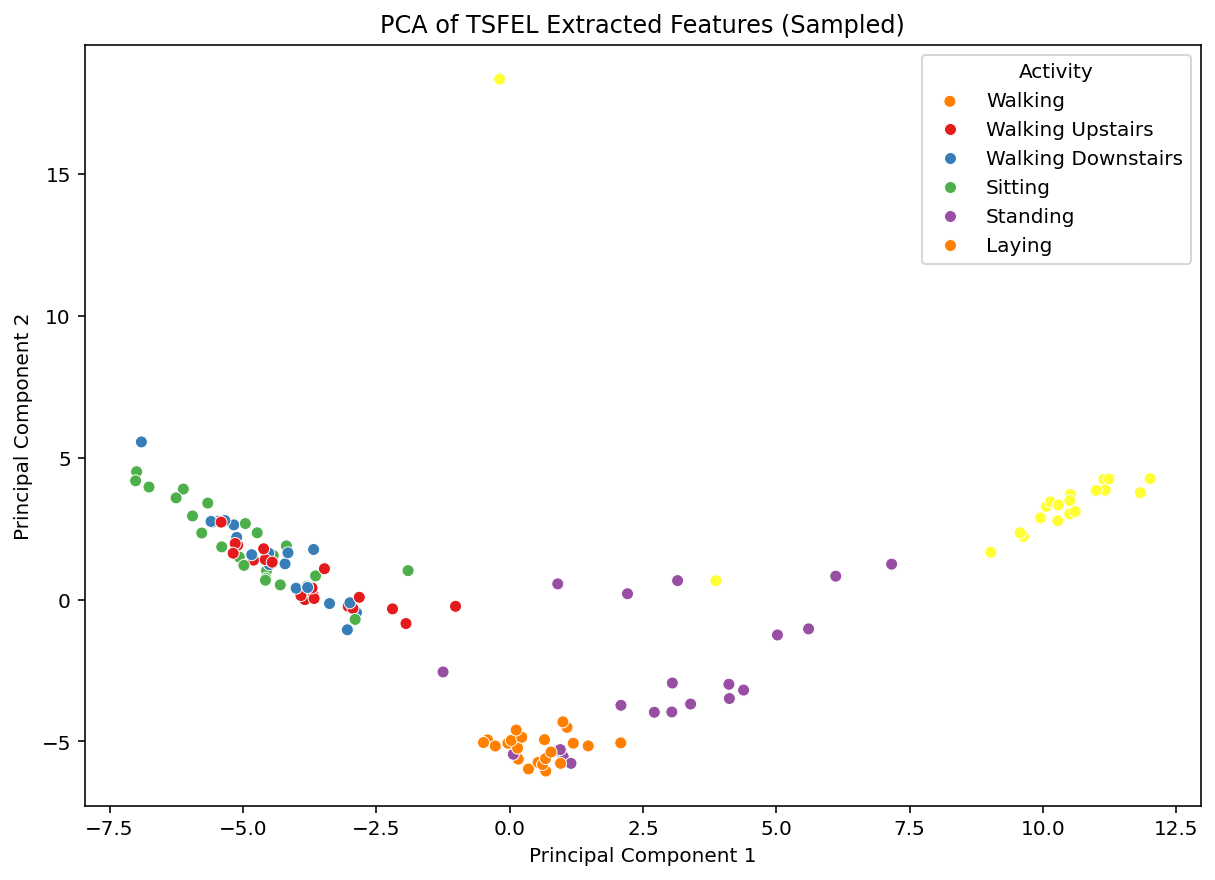

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='activity', data=pca_df_tsfel, palette='Set1')
plt.title('PCA of TSFEL Extracted Features (Sampled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity', loc='best', labels=[
    'Walking', 'Walking Upstairs', 'Walking Downstairs', 
    'Sitting', 'Standing', 'Laying'])
plt.show()

### Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [23]:
X_train_data_path = "./UCI HAR Dataset/train/X_train.csv" 
X_train_dataset = pd.read_csv(X_train_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_train_dataset.shape[1]:
    X_train_dataset.columns = feature_names
y_train_data_path="./UCI HAR Dataset/train/y_train.csv"
y_train_dataset = pd.read_csv(y_train_data_path, header=None)
y_train_dataset.columns = ['Activity']
print(y_train_dataset.shape)


(7352, 1)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_data = scaler.fit_transform(X_train_dataset)

print(f"Scaled data shape: {scaled_X_data.shape}")

Scaled data shape: (7352, 561)


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_data_pca = pca.fit_transform(scaled_X_data)

print(f"PCA-transformed data shape: {X_data_pca.shape}")

PCA-transformed data shape: (7352, 2)


In [26]:
pca_df = pd.DataFrame(data=X_data_pca, columns=['PCA1', 'PCA2'])
pca_df['activity'] = y_train_dataset
pca_df.describe()

PCA1          PCA2     activity
count  7.352000e+03  7.352000e+03  7352.000000
mean   3.092678e-16  4.639017e-17     3.643362
std    1.687961e+01  6.076400e+00     1.744802
min   -1.742164e+01 -2.176501e+01     1.000000
25%   -1.503204e+01 -4.162200e+00     2.000000
50%   -1.039665e+01  3.094378e-01     4.000000
75%    1.418787e+01  4.041230e+00     5.000000
max    9.546214e+01  5.869744e+01     6.000000

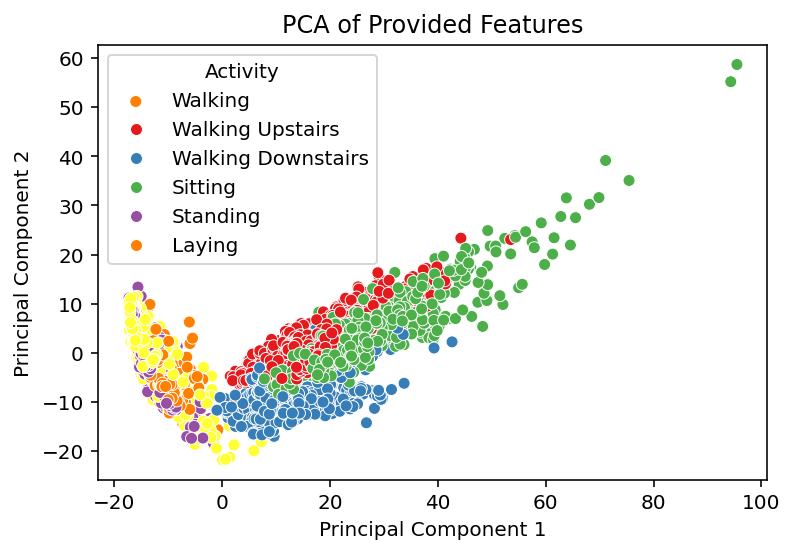

In [27]:
plt.figsize=(10, 7)
sns.scatterplot(x='PCA1', y='PCA2', hue='activity', data=pca_df, palette='Set1')
plt.title('PCA of Provided Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity', loc='best', labels=[
    'Walking', 'Walking Upstairs', 'Walking Downstairs', 
    'Sitting', 'Standing', 'Laying'])
plt.show()

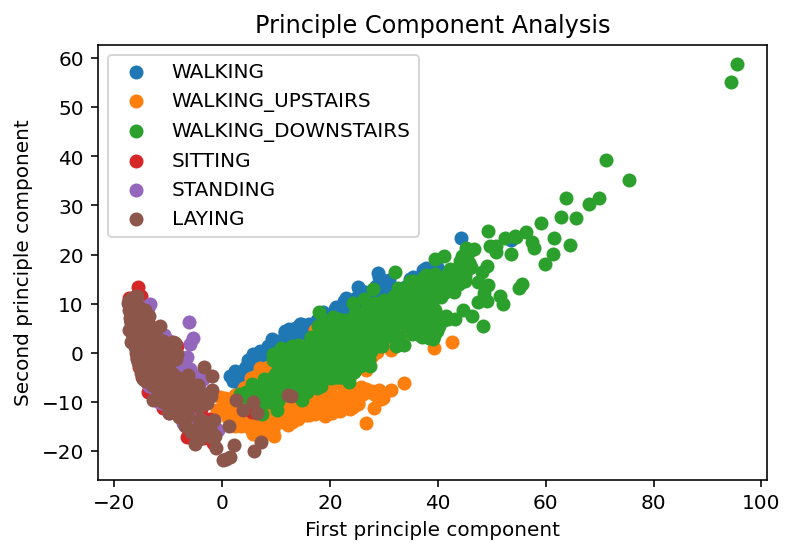

In [28]:
for act_code,activity in activity_dictionary.items():
    rows=np.where(y_train_dataset==act_code)
    plt.scatter(X_data_pca[rows, 0], X_data_pca[rows, 1],label=activity)
    plt.xlabel('First principle component')
    plt.ylabel('Second principle component')
    plt.title('Principle Component Analysis')
plt.legend()
plt.show()

### Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

PCA on TSFEL-Extracted Features is likely the best approach. It offers a balance of capturing diverse data characteristics while providing a meaningful visualization. However, if the provided features are high-quality and relevant, they also serve well in visualizing the data, by providing better clusters and helping to classify data.

## Question 4:

## Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [29]:
tsfel_df=pd.DataFrame(train_tsfel_features_df)
tsfel_corr_matr=pd.DataFrame(tsfel_df.corr()).fillna(0)
tsfel_corr_matr.head()

#NaN values in the correlation matrix of TSFEL-extracted features are caused by constant features with zero variance.
#Here we are replacing the NaN values with 0.

acc_x_Absolute energy  acc_x_Average power  \
acc_x_Absolute energy                       1.000000             1.000000   
acc_x_Average power                         1.000000             1.000000   
acc_x_ECDF Percentile Count_0               0.000000             0.000000   
acc_x_ECDF Percentile Count_1               0.000000             0.000000   
acc_x_ECDF Percentile_0                     0.858881             0.858881   

                               acc_x_ECDF Percentile Count_0  \
acc_x_Absolute energy                                    0.0   
acc_x_Average power                                      0.0   
acc_x_ECDF Percentile Count_0                            0.0   
acc_x_ECDF Percentile Count_1                            0.0   
acc_x_ECDF Percentile_0                                  0.0   

                               acc_x_ECDF Percentile Count_1  \
acc_x_Absolute energy                                    0.0   
acc_x_Average power                                      0.0   
acc_x_ECDF Percentile Count_0                            0.0   
acc_x_ECDF Percentile Count_1                            0.0   
acc_x_ECDF Percentile_0                                  0.0   

                               acc_x_ECDF Percentile_0  \
acc_x_Absolute energy                         0.858881   
acc_x_Average power                           0.858881   
acc_x_ECDF Percentile Count_0                 0.000000   
acc_x_ECDF Percentile Count_1                 0.000000   
acc_x_ECDF Percentile_0                       1.000000   

                               acc_x_ECDF Percentile_1  acc_x_ECDF_0  \
acc_x_Absolute energy                         0.971082           0.0   
acc_x_Average power                           0.971082           0.0   
acc_x_ECDF Percentile Count_0                 0.000000           0.0   
acc_x_ECDF Percentile Count_1                 0.000000           0.0   
acc_x_ECDF Percentile_0                       0.798627           0.0   

                               acc_x_ECDF_1  acc_x_ECDF_2  acc_x_ECDF_3  ...  \
acc_x_Absolute energy                   0.0           0.0           0.0  ...   
acc_x_Average power                     0.0           0.0           0.0  ...   
acc_x_ECDF Percentile Count_0           0.0           0.0           0.0  ...   
acc_x_ECDF Percentile Count_1           0.0           0.0           0.0  ...   
acc_x_ECDF Percentile_0                 0.0           0.0           0.0  ...   

                               acc_z_Mean  acc_z_Mean absolute deviation  \
acc_x_Absolute energy           -0.658687                       0.421560   
acc_x_Average power             -0.658687                       0.421560   
acc_x_ECDF Percentile Count_0    0.000000                       0.000000   
acc_x_ECDF Percentile Count_1    0.000000                       0.000000   
acc_x_ECDF Percentile_0         -0.511350                       0.065955   

                               acc_z_Median  acc_z_Median absolute deviation  \
acc_x_Absolute energy             -0.664966                         0.401868   
acc_x_Average power               -0.664966                         0.401868   
acc_x_ECDF Percentile Count_0      0.000000                         0.000000   
acc_x_ECDF Percentile Count_1      0.000000                         0.000000   
acc_x_ECDF Percentile_0           -0.517735                         0.024188   

                               acc_z_Min  acc_z_Peak to peak distance  \
acc_x_Absolute energy          -0.634877                     0.472007   
acc_x_Average power            -0.634877                     0.472007   
acc_x_ECDF Percentile Count_0   0.000000                     0.000000   
acc_x_ECDF Percentile Count_1   0.000000                     0.000000   
acc_x_ECDF Percentile_0        -0.364541                     0.094344   

                               acc_z_Root mean square  acc_z_Skewness  \
acc_x_Absolute energy                       -0.827730       -0.014828   
acc_x_Averag

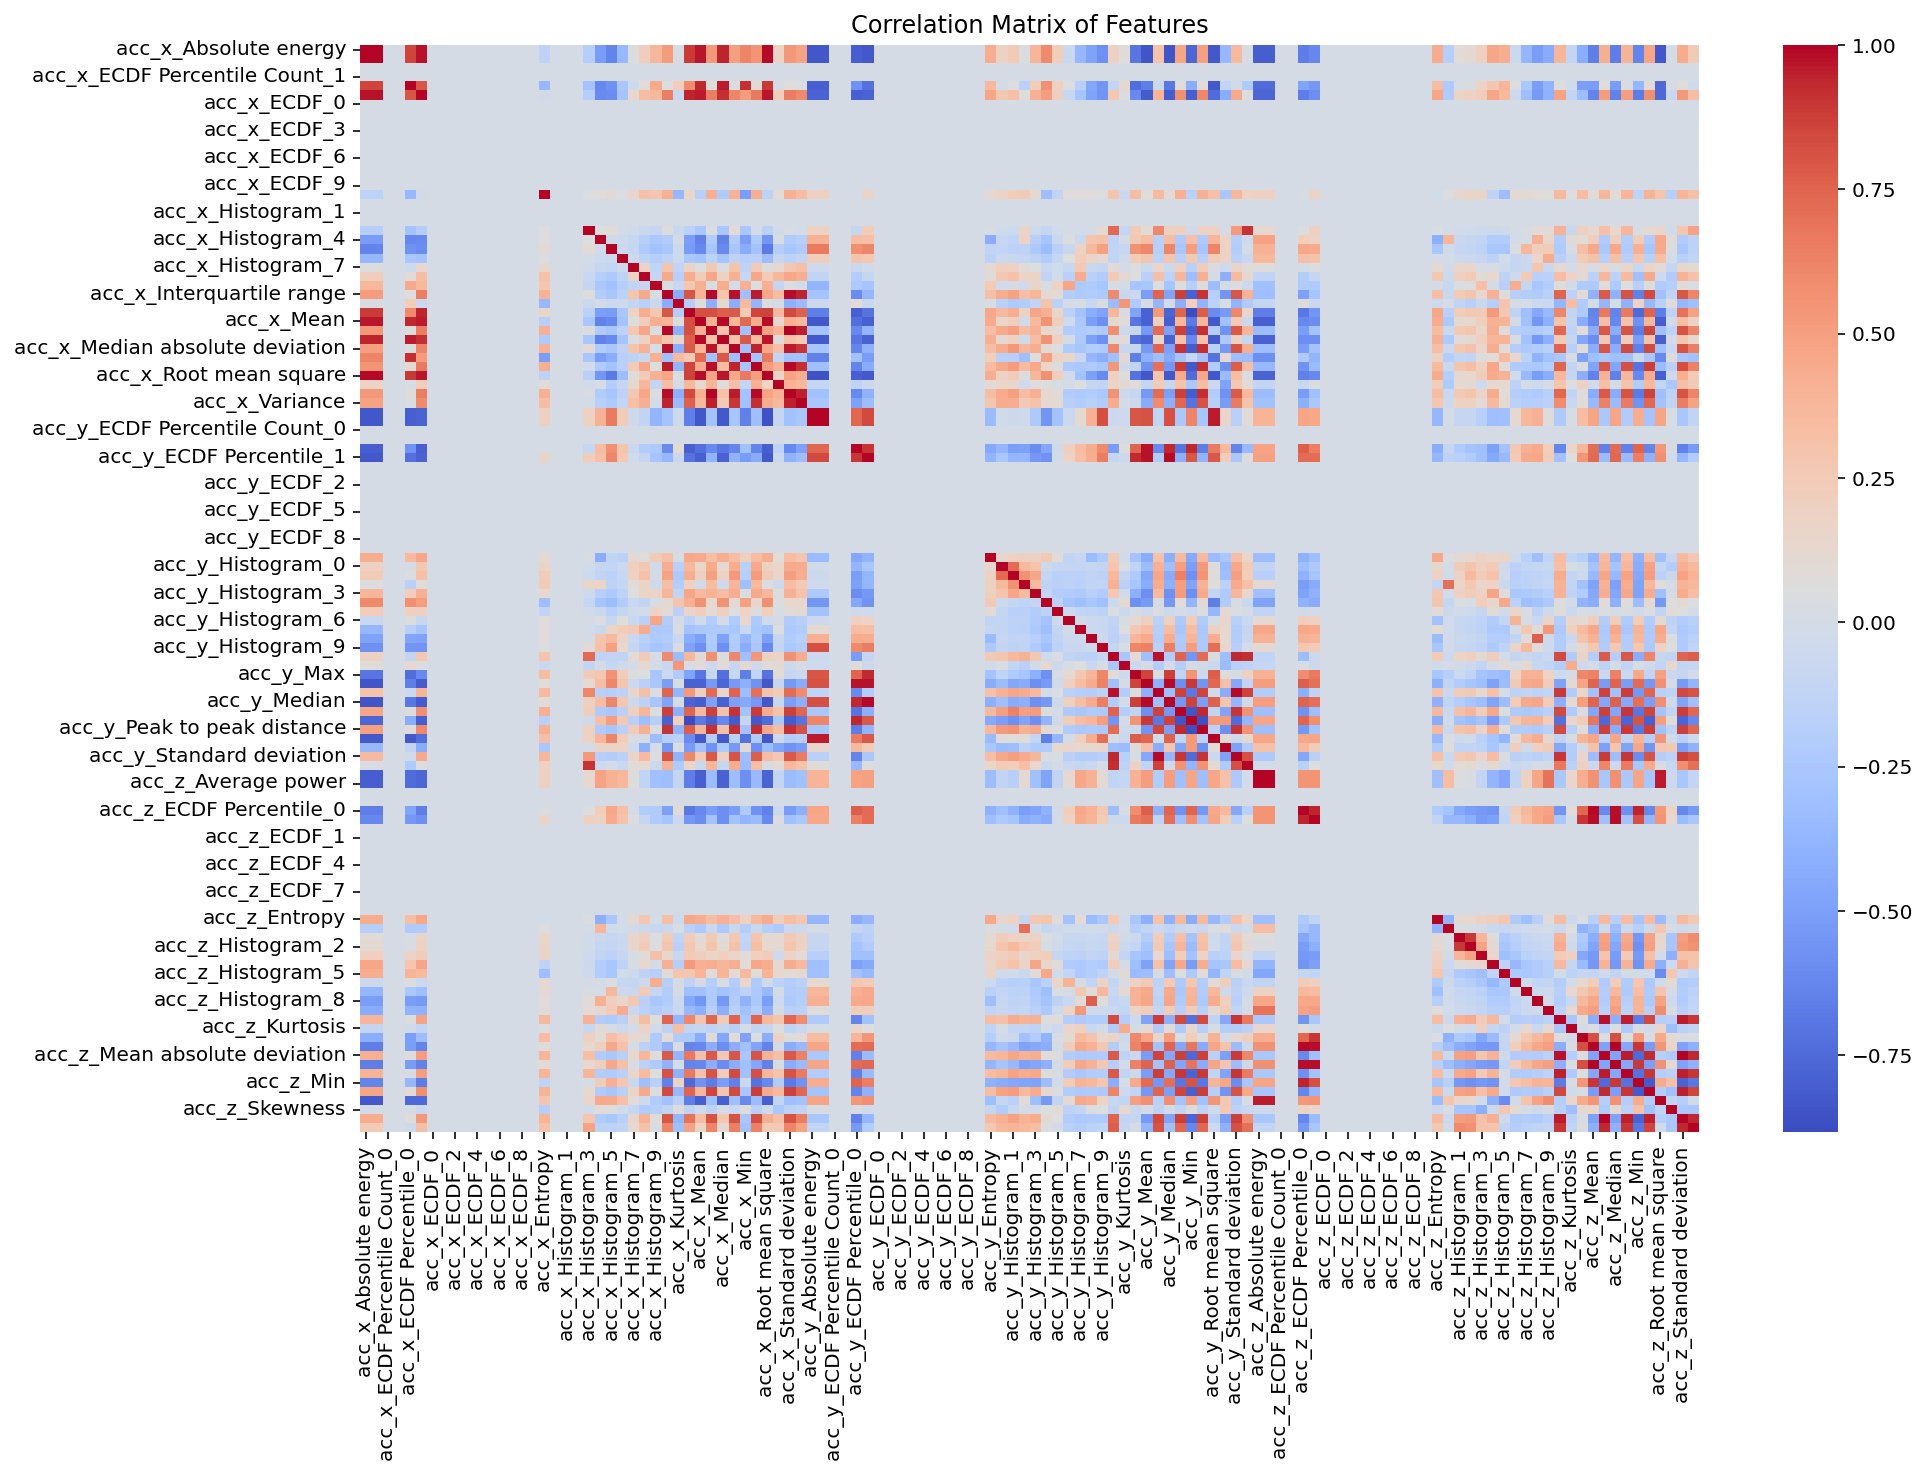

In [30]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(tsfel_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [31]:
dataset_df=pd.DataFrame(scaled_X_data,columns=feature_names)
dataset_corr_matr=pd.DataFrame(dataset_df.corr())
dataset_corr_matr.head()


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
tBodyAcc-mean()-X           1.000000           0.148061          -0.256952   
tBodyAcc-mean()-Y           0.148061           1.000000          -0.078769   
tBodyAcc-mean()-Z          -0.256952          -0.078769           1.000000   
tBodyAcc-std()-X            0.000619          -0.045160          -0.020217   
tBodyAcc-std()-Y           -0.021903          -0.044920          -0.016641   

                   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
tBodyAcc-mean()-X          0.000619         -0.021903         -0.044617   
tBodyAcc-mean()-Y         -0.045160         -0.044920         -0.049746   
tBodyAcc-mean()-Z         -0.020217         -0.016641         -0.008410   
tBodyAcc-std()-X           1.000000          0.927461          0.851668   
tBodyAcc-std()-Y           0.927461          1.000000          0.895510   

                   tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  \
tBodyAcc-mean()-X          0.006290         -0.022754         -0.047558   
tBodyAcc-mean()-Y         -0.044180         -0.045049         -0.050402   
tBodyAcc-mean()-Z         -0.018747         -0.015203         -0.001988   
tBodyAcc-std()-X           0.998632          0.920888          0.846392   
tBodyAcc-std()-Y           0.922803          0.997347          0.894509   

                   tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
tBodyAcc-mean()-X          0.044062  ...                         0.030681   
tBodyAcc-mean()-Y         -0.038108  ...                        -0.022395   
tBodyAcc-mean()-Z         -0.037197  ...                        -0.020481   
tBodyAcc-std()-X           0.980844  ...                        -0.065987   
tBodyAcc-std()-Y           0.917366  ...                        -0.105621   

                   fBodyBodyGyroJerkMag-skewness()  \
tBodyAcc-mean()-X                        -0.017557   
tBodyAcc-mean()-Y                        -0.001587   
tBodyAcc-mean()-Z                         0.020091   
tBodyAcc-std()-X                          0.148034   
tBodyAcc-std()-Y                          0.206227   

                   fBodyBodyGyroJerkMag-kurtosis()  \
tBodyAcc-mean()-X                        -0.015613   
tBodyAcc-mean()-Y                        -0.004459   
tBodyAcc-mean()-Z                         0.019127   
tBodyAcc-std()-X                          0.115565   
tBodyAcc-std()-Y                          0.176946   

                   angle(tBodyAccMean,gravity)  \
tBodyAcc-mean()-X                    -0.544320   
tBodyAcc-mean()-Y                     0.070559   
tBodyAcc-mean()-Z                     0.052841   
tBodyAcc-std()-X                     -0.035011   
tBodyAcc-std()-Y                     -0.020379   

                   angle(tBodyAccJerkMean),gravityMean)  \
tBodyAcc-mean()-X                              0.012173   
tBodyAcc-mean()-Y                             -0.013541   
tBodyAcc-mean()-Z                             -0.039836   
tBodyAcc-std()-X                              -0.021633   
tBodyAcc-std()-Y                              -0.012505   

                   angle(tBodyGyroMean,gravityMean)  \
tBodyAcc-mean()-X                          0.037444   
tBodyAcc-mean()-Y                          0.017967   
tBodyAcc-mean()-Z                         -0.063609   
tBodyAcc-std()-X                           0.018985   
tBodyAcc-std()-Y                          -0.008507   

                   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
tBodyAcc-mean()-X                              0.028844             -0.035257   
tBodyAcc-mean()-Y                              0.075679             -0.005309   
tBodyAcc-mean()-Z                             -0.034037              0.008587   
tBodyAcc-std()-X                              -0.024810             -0.371653   
tBodyAcc-std()-Y                              -0.014592             -0.380531   

                   angle(Y,gravityMean)  angle(Z,gravityMean)

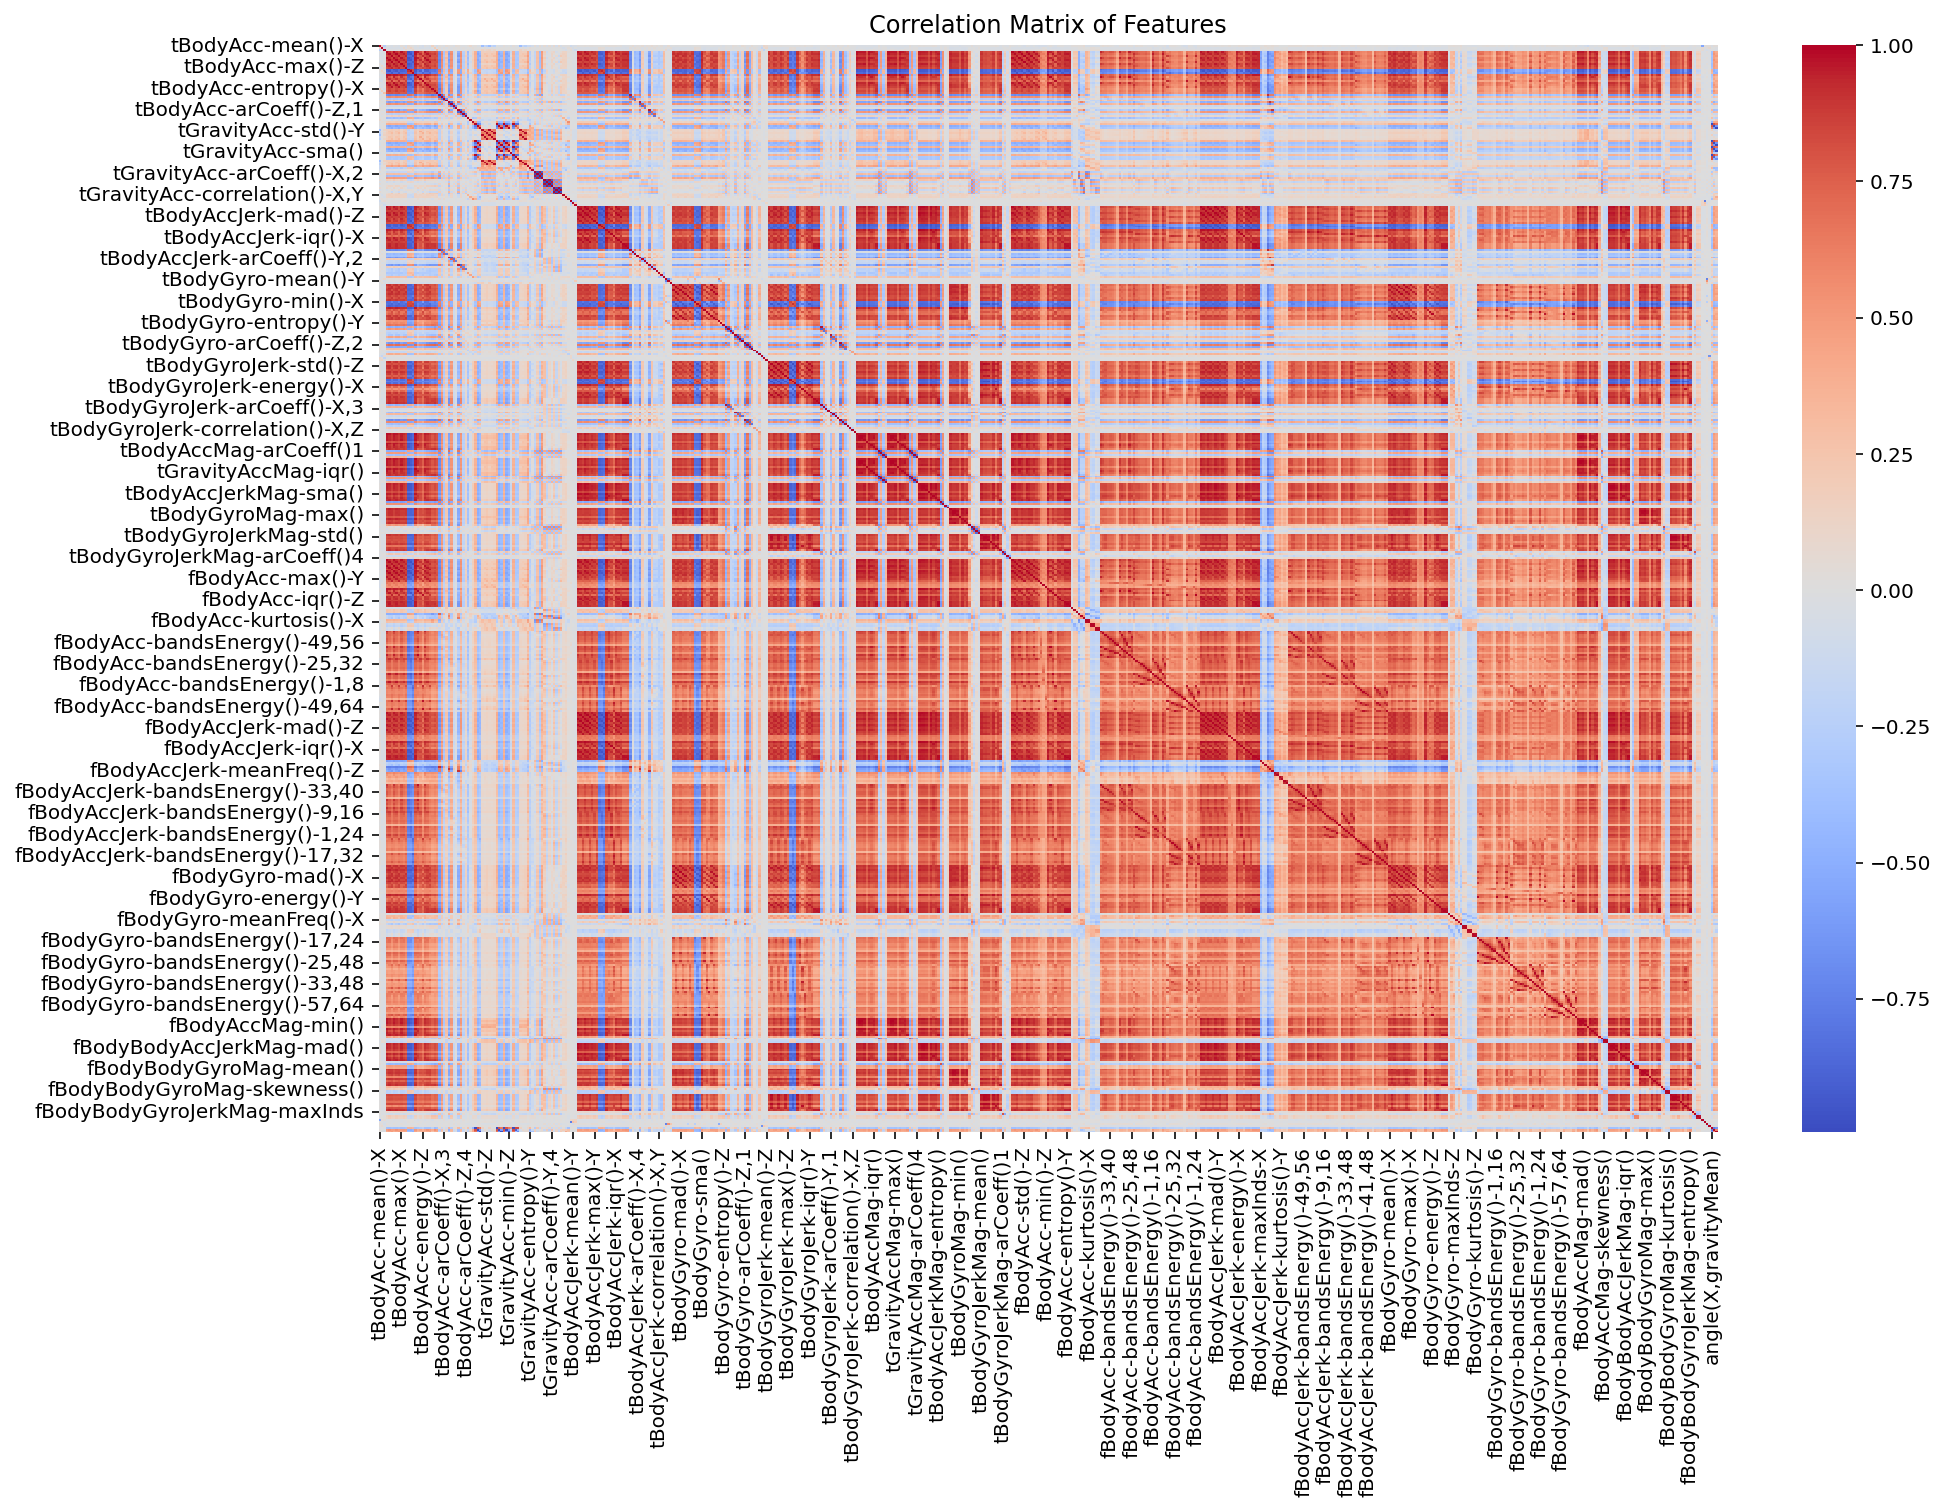

In [32]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(dataset_corr_matr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [33]:
threshold = 0.9
high_corr_pairs_tsfel = []

for i in range(tsfel_corr_matr.shape[0]):
    for j in range(i + 1, tsfel_corr_matr.shape[0]):
        if abs(tsfel_corr_matr.iloc[i, j]) > threshold:
            high_corr_pairs_tsfel.append((tsfel_corr_matr.index[i], tsfel_corr_matr.columns[j], tsfel_corr_matr.iloc[i, j]))

high_corr_df_tsfel = pd.DataFrame(high_corr_pairs_tsfel, columns=['Feature 1', 'Feature 2', 'Correlation'])

print("Highly Correlated Features (Correlation > 0.9 or < -0.9):")
print(high_corr_df_tsfel)

Highly Correlated Features (Correlation > 0.9 or < -0.9):
                          Feature 1                 Feature 2  Correlation
0             acc_x_Absolute energy       acc_x_Average power     1.000000
1             acc_x_Absolute energy   acc_x_ECDF Percentile_1     0.971082
2             acc_x_Absolute energy                acc_x_Mean     0.969665
3             acc_x_Absolute energy              acc_x_Median     0.943944
4             acc_x_Absolute energy    acc_x_Root mean square     0.989868
..                              ...                       ...          ...
78    acc_z_Mean absolute deviation            acc_z_Variance     0.935401
79  acc_z_Median absolute deviation  acc_z_Standard deviation     0.953967
80  acc_z_Median absolute deviation            acc_z_Variance     0.903365
81      acc_z_Peak to peak distance  acc_z_Standard deviation     0.953638
82         acc_z_Standard deviation            acc_z_Variance     0.934755

[83 rows x 3 columns]


In [34]:
threshold = 0.9
high_corr_pairs_dataset = []

for i in range(dataset_corr_matr.shape[0]):
    for j in range(i + 1, dataset_corr_matr.shape[0]):
        if abs(dataset_corr_matr.iloc[i, j]) > threshold:
            high_corr_pairs_dataset.append((dataset_corr_matr.index[i], dataset_corr_matr.columns[j], dataset_corr_matr.iloc[i, j]))

# Convert the list to a DataFrame for better readability
high_corr_df_dataset = pd.DataFrame(high_corr_pairs_dataset, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Step 5: Display the highly correlated features
print("Highly Correlated Features (Correlation > 0.9 or < -0.9):")
print(high_corr_df_dataset)

Highly Correlated Features (Correlation > 0.9 or < -0.9):
                            Feature 1                        Feature 2  \
0                    tBodyAcc-std()-X                 tBodyAcc-std()-Y   
1                    tBodyAcc-std()-X                 tBodyAcc-mad()-X   
2                    tBodyAcc-std()-X                 tBodyAcc-mad()-Y   
3                    tBodyAcc-std()-X                 tBodyAcc-max()-X   
4                    tBodyAcc-std()-X                 tBodyAcc-min()-X   
...                               ...                              ...   
8201       fBodyBodyGyroJerkMag-mad()       fBodyBodyGyroJerkMag-iqr()   
8202       fBodyBodyGyroJerkMag-max()       fBodyBodyGyroJerkMag-sma()   
8203       fBodyBodyGyroJerkMag-max()       fBodyBodyGyroJerkMag-iqr()   
8204       fBodyBodyGyroJerkMag-sma()       fBodyBodyGyroJerkMag-iqr()   
8205  fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()   

      Correlation  
0        0.927461  
1        0.99

These highly correlated pairs are the redundant features. We have kept correlation threshhold to be 0.9. Hence any two features having correlation greater than 0.9 will be considered  to be redundant.

# Task 2

In [35]:
X_train

array([[[ 1.007544  , -0.1637979 , -0.1496132 ],
        [ 1.009979  , -0.161686  , -0.1536227 ],
        [ 1.01008   , -0.160879  , -0.1589772 ],
        ...,
        [ 1.002052  , -0.1727968 , -0.1738661 ],
        [ 1.002875  , -0.1738667 , -0.1729062 ],
        [ 1.001078  , -0.1738621 , -0.1744945 ]],

       [[ 0.9100345 , -0.09837841,  0.2526748 ],
        [ 0.8547794 , -0.1036736 ,  0.2466994 ],
        [ 0.8448371 , -0.1162746 ,  0.233289  ],
        ...,
        [ 0.385755  , -0.258573  ,  0.1717271 ],
        [ 0.5271969 , -0.2313261 ,  0.1711758 ],
        [ 0.5528433 , -0.2209706 ,  0.1948508 ]],

       [[ 1.015056  , -0.03396467,  0.1354992 ],
        [ 1.011082  , -0.0325952 ,  0.1431367 ],
        [ 1.014167  , -0.03133387,  0.1503816 ],
        ...,
        [ 1.012933  , -0.03234481,  0.1501941 ],
        [ 1.012485  , -0.03568829,  0.1518454 ],
        [ 1.011004  , -0.03656625,  0.1570806 ]],

       ...,

       [[ 0.0365117 ,  0.7822584 ,  0.6494456 ],
        [ 0

## Question 1: Use Sklearn Library to train Decision Tress.

### Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [36]:
X_train_for_dt = X_train.reshape(X_train.shape[1]*X_train.shape[0],X_train.shape[2])
y_train_for_dt = np.repeat(y_train, 500)
extended_y_train_for_dt = y_train_for_dt.reshape(-1, 1)
train_result_dt = np.hstack((X_train_for_dt, extended_y_train_for_dt))
print(train_result_dt.shape)

X_test_for_dt = X_test.reshape(X_test.shape[1]*X_test.shape[0],X_test.shape[2])
y_test_for_dt = np.repeat(y_test, 500)
extended_y_test_for_dt = y_test_for_dt.reshape(-1, 1)
test_result_dt = np.hstack((X_test_for_dt, extended_y_test_for_dt))
print(test_result_dt.shape)


(63000, 4)
(27000, 4)


In [37]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_raw=DecisionTreeClassifier(random_state=seed)

In [38]:
dec_tree_raw.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
#training
dec_tree_raw.fit(X_train_for_dt,y_train_for_dt)

DecisionTreeClassifier(random_state=42)

In [40]:
#testing
y_predicted_from_dt_raw = dec_tree_raw.predict(X_test_for_dt)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [42]:
#r
# print(y_pred)
accuracy=accuracy_score(extended_y_test_for_dt,y_predicted_from_dt_raw)
recall=recall_score(extended_y_test_for_dt,y_predicted_from_dt_raw, average='weighted')
precision=precision_score(extended_y_test_for_dt,y_predicted_from_dt_raw, average='weighted')#multiclass data
confusion_matrix=confusion_matrix(extended_y_test_for_dt,y_predicted_from_dt_raw)

print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"Confusion Matrix : \n{confusion_matrix}")

Accuracy : 0.5705555555555556
Recall : 0.5705555555555556
Precision : 0.6077018776715596
Confusion Matrix : 
[[1686 1471 1724   17  102    0]
 [1697 2394 1775   22  112    0]
 [ 838  585 1499   22   55    1]
 [  64    0  481 3532  423    0]
 [ 763  412  220  811 1794    0]
 [   0    0    0    0    0 4500]]


### Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [43]:
import tsfel
import pandas as pd
from sklearn.preprocessing import StandardScaler

test_tsfel_features_list = []
cfg = tsfel.get_features_by_domain("statistical")

for i in range(X_test.shape[0]):
    test_data_window_for_tsfel = pd.DataFrame(X_test[i], columns=['acc_x', 'acc_y', 'acc_z'])
    
    features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)
    features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)
    features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)    
    
    features = pd.concat([features_x, features_y, features_z], axis=1)    
    
    test_tsfel_features_list.append(features)
    
test_tsfel_features_df = pd.concat(test_tsfel_features_list, ignore_index=True)

scaler = StandardScaler()
test_standardized_tsfel_features_df = scaler.fit_transform(test_tsfel_features_df)

*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:11: UserWarning: Using default sampling frequency set in configuration file.
  features_x = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:12: UserWarning: Using default sampling frequency set in configuration file.
  features_y = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-43-03539bd97c1f>:13: UserWarning: Using default sampling frequency set in configuration file.
  features_z = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel[['acc_z']], verbose=1)



*** Feature extraction finished ***


In [44]:
train_standardized_tsfel_features.shape

(126, 120)

In [45]:
test_standardized_tsfel_features_df.shape

(54, 120)

In [46]:
y_test.shape

(54,)

In [47]:
dec_tree_tsfel=DecisionTreeClassifier(random_state=seed)
dec_tree_tsfel.fit(train_standardized_tsfel_features, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred_tsfel=dec_tree_tsfel.predict(test_standardized_tsfel_features_df)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

accuracy_tsfel=accuracy_score(y_test,y_pred_tsfel)
recall_tsfel=recall_score(y_test,y_pred_tsfel, average='weighted')
precision_tsfel=precision_score(y_test,y_pred_tsfel, average='weighted')#multiclass data
confusion_matrix_tsfel=confusion_matrix(y_test,y_pred_tsfel)

print(f"Accuracy : {accuracy_tsfel}")
print(f"Recall : {recall_tsfel}")
print(f"Precision : {precision_tsfel}")
print(f"Confusion Matrix : \n{confusion_matrix_tsfel}")

Accuracy : 0.7592592592592593
Recall : 0.7592592592592593
Precision : 0.7864604531271198
Confusion Matrix : 
[[ 4  4  2  0  0  0]
 [ 1 10  1  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  9  0  0]
 [ 1  0  0  4  3  0]
 [ 0  0  0  0  0  9]]


### Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

In [50]:
X_test_data_path = "./UCI HAR Dataset/test/X_test.csv" 
X_test_dataset = pd.read_csv(X_test_data_path, header=None)
feature_names_path = "./UCI HAR Dataset/features.csv"
feature_names_df = pd.read_csv(feature_names_path, header=None)
feature_names = feature_names_df[0].tolist()
if len(feature_names) == X_test_dataset.shape[1]:
    X_test_dataset.columns = feature_names
y_test_data_path="./UCI HAR Dataset/test/y_test.csv"
y_test_dataset = pd.read_csv(y_test_data_path, header=None)
y_test_dataset.columns = ['Activity']


In [51]:
dec_tree_dataset=DecisionTreeClassifier(random_state=seed)
dec_tree_dataset.fit(X_train_dataset, y_train_dataset)

DecisionTreeClassifier(random_state=42)

In [52]:
y_dataset_pred=dec_tree_dataset.predict(X_test_dataset)

In [53]:
accuracy_dataset=accuracy_score(y_test_dataset,y_dataset_pred)
recall_dataset=recall_score(y_test_dataset,y_dataset_pred, average='weighted')
precision_dataset=precision_score(y_test_dataset,y_dataset_pred, average='weighted')#multiclass data
confusion_matrix_dataset=confusion_matrix(y_test_dataset,y_dataset_pred)

print(f"Accuracy : {accuracy_dataset}")
print(f"Recall : {recall_dataset}")
print(f"Precision : {precision_dataset}")
print(f"Confusion Matrix : \n{confusion_matrix_dataset}")

Accuracy : 0.8622327790973872
Recall : 0.8622327790973872
Precision : 0.8632726592620287
Confusion Matrix : 
[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


### Compare the results of the three models. Which model do you think is better?

As we can see, decision tree model using the features provided in the dataset performs the best.

## Question 2:

### Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.

range(2, 9)
[0.4182592592592593, 0.5204074074074074, 0.6377037037037037, 0.6625555555555556, 0.6811111111111111, 0.6756666666666666, 0.6684444444444444]
[0.5555555555555556, 0.7962962962962963, 0.7222222222222222, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593, 0.7592592592592593]
[0.5310485239226331, 0.7224295894129623, 0.8096369189005769, 0.838140481845945, 0.8544282321004412, 0.8618934509670851, 0.8683406854428232]


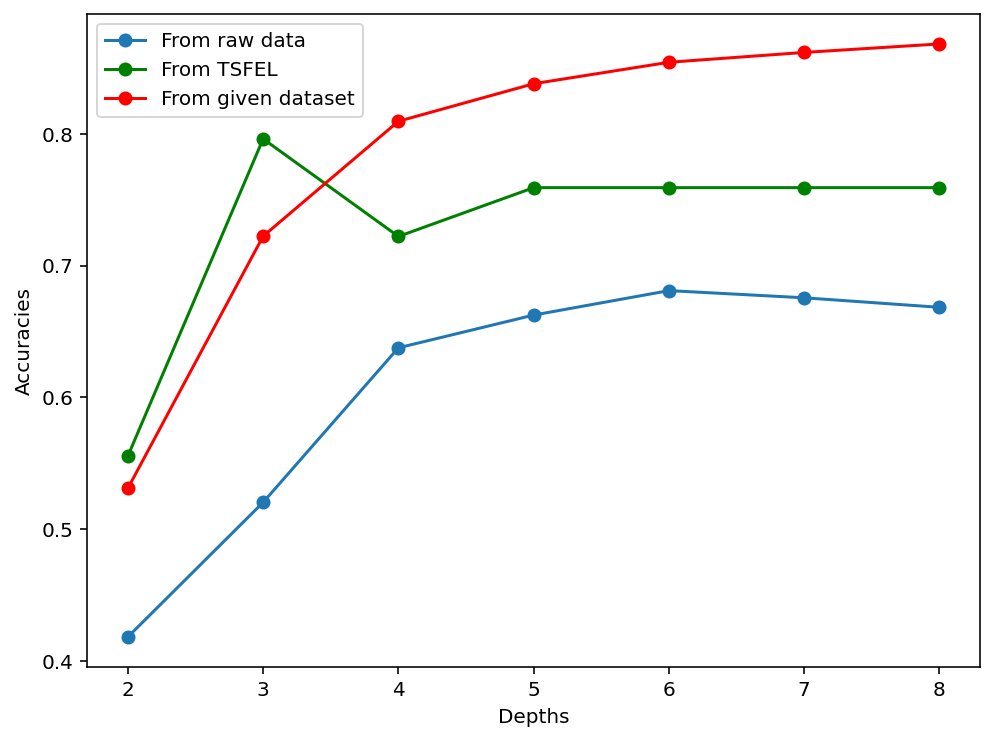

In [54]:
depth_list=range(2,9)
accuracy_list1=[]
accuracy_list2=[]
accuracy_list3=[]

for d in depth_list:
    
    dtc1=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc2=DecisionTreeClassifier(max_depth=d,random_state=42)
    dtc3=DecisionTreeClassifier(max_depth=d,random_state=42)
    
    dtc1.fit(X_train_for_dt,y_train_for_dt)
    y_pred_for_1=dtc1.predict(X_test_for_dt)
    acc_1=accuracy_score(y_test_for_dt,y_pred_for_1)

    dtc2.fit(train_standardized_tsfel_features, y_train)
    y_pred_for_2=dtc2.predict(test_standardized_tsfel_features_df)
    acc_2=accuracy_score(y_test,y_pred_for_2)

    dtc3.fit(X_train_dataset, y_train_dataset)
    y_pred_for_3=dtc3.predict(X_test_dataset)
    acc_3=accuracy_score(y_test_dataset,y_pred_for_3)
    
    accuracy_list1.append(acc_1)
    accuracy_list2.append(acc_2)
    accuracy_list3.append(acc_3)
    
print(depth_list)
print(accuracy_list1)
print(accuracy_list2)
print(accuracy_list3)

plt.figure(figsize=(8,6))

plt.plot(depth_list,accuracy_list1,marker="o",label="From raw data")
plt.plot(depth_list,accuracy_list2,marker="o",color="Green",label="From TSFEL")
plt.plot(depth_list,accuracy_list3,marker="o",color="Red",label="From given dataset")

plt.xlabel("Depths")
plt.ylabel("Accuracies")
plt.legend()
plt.show()

## Question 3:

### Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

If the performance of standing, sitting or laying is worst ( here zero) it will be due to possible misclassification because of almost constant and similar acceleration to other activities

# Task3: Prompt Engineering for Large Language Models (LLMs) 

## Question 1:

###  Demonstrate how to use Zero-Shot Learning and Few-Shot Learning to classify human activities based on the featurized accelerometer data. Qualitatively demonstrate the performance of Few-Shot Learning with Zero-Shot Learning. Which method performs better? Why?

In [55]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq
import creds

In [56]:
# Groq API and Models 
Groq_Token = creds.api_key  # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [57]:
X_train_for_llm = X_train.reshape(X_train.shape[1]*X_train.shape[0],X_train.shape[2])
y_train_for_llm = np.repeat(y_train, 500)
extended_y_train_for_llm = y_train_for_llm.reshape(-1, 1)
train_result = np.hstack((X_train_for_llm, extended_y_train_for_llm))
print(train_result.shape)

X_test_for_llm = X_test.reshape(X_test.shape[1]*X_test.shape[0],X_test.shape[2])
y_test_for_llm = np.repeat(y_test, 500)
extended_y_test_for_llm = y_test_for_llm.reshape(-1, 1)
test_result = np.hstack((X_test_for_llm, extended_y_test_for_llm))
print(test_result.shape)

(63000, 4)
(27000, 4)


In [58]:
prompt_test_a = ""
indices = np.arange(1,27000,180)
randomized_result_test_a = test_result[indices]
randomized_test_for_llm = y_test_for_llm[indices]
for x in randomized_result_test_a:
    prompt_test_a = prompt_test_a + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_test_a)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}



Acceleration 53: 0.01219354,0.2258038,0.9699623
Acceleration 54: 0.005512862,0.2092509,0.9798198
Acceleration 55: 0.01724881,0.2164439,0.9692108
Acceleration 56: 1.022425,-0.1237509,0.09207211
Acceleration 57: 1.016084,-0.1216043,0.08477703
Acceleration 58: 1.016524,-0.1334434,0.0752032
Acceleration 59: 1.640231,-0.1061583,0.160092
Acceleration 60: 0.7441103,-0.1487318,-0.006541643
Acceleration 61: 1.148807,-0.2056255,-0.05984273
Acceleration 62: 1.171054,-0.7571202,-0.2654305
Acceleration 63: 0.8076031,-0.0860607,0.04258853
Acceleration 64: 0.8508562,-0.2709537,-0.004946809
Acceleration 65: 1.021841,-0.1379226,-0.06889954
Acceleration 66: 1.021147,-0.1305605,-0.06099132
Acceleration 67: 0.1021254,0.7521585,0.6239952
Acceleration 68: 0.1134443,0.7635097,0.6211214
Acceleration 69: 0.1018466,0.7472229,0.634267
Acceleration 70: 0.8730204,0.4499982,0.2184407
Acceleration 71: 0.8746904,0.4474441,0.2014727
Acceleration 72: 0.8715686,0.4488259,0.2046181
Acceleration 73: 1.186279,0.164883,-0.

In [59]:
prompt_train_a = ""

randomized_result_train_a = train_result[indices]
i=1
for x in randomized_result_train_a:
    prompt_train_a = prompt_train_a + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]} = {activity_dictionary[x[3]]}"
    i+=1
print(prompt_train_a)
#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}



Acceleration 1: 1.009979,-0.161686,-0.1536227 = STANDING
Acceleration 2: 1.005466,-0.1714291,-0.1699651 = STANDING
Acceleration 3: 1.005925,-0.1746899,-0.1653522 = STANDING
Acceleration 4: 1.866254,-0.1318754,0.2461334 = WALKING_DOWNSTAIRS
Acceleration 5: 1.043535,-0.1069254,0.2542583 = WALKING_DOWNSTAIRS
Acceleration 6: 1.332549,-0.3163074,0.1965431 = WALKING_DOWNSTAIRS
Acceleration 7: 1.009519,-0.03148007,0.1701953 = STANDING
Acceleration 8: 1.026081,-0.04128697,0.1403695 = STANDING
Acceleration 9: 1.024724,-0.0273791,0.1648624 = STANDING
Acceleration 10: 0.8176987,-0.2800989,-0.2833302 = WALKING
Acceleration 11: 0.7750142,-0.07706664,-0.2164444 = WALKING
Acceleration 12: 0.8370118,-0.1115488,-0.249991 = WALKING
Acceleration 13: 1.017999,-0.1400032,0.08222181 = STANDING
Acceleration 14: 1.019421,-0.1273111,0.07508416 = STANDING
Acceleration 15: 1.016119,0.08131633,-0.1020023 = SITTING
Acceleration 16: 1.01236,0.08157798,-0.1186625 = SITTING
Acceleration 17: 1.019906,0.0846072,-0.115

In [60]:
#zero-shot-final
# Statement 
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_test_a}

""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_zero_shot_output_string = answer.content

print(answer.content)

Here is the list of activity labels:

1. STANDING
2. STANDING
3. STANDING
4. WALKING
5. WALKING
6. WALKING
7. WALKING
8. WALKING
9. WALKING
10. WALKING
11. WALKING
12. WALKING_DOWNSTAIRS
13. WALKING_DOWNSTAIRS
14. WALKING_DOWNSTAIRS
15. STANDING
16. STANDING
17. STANDING
18. STANDING
19. STANDING
20. STANDING
21. STANDING
22. WALKING_UPSTAIRS
23. WALKING_UPSTAIRS
24. WALKING_UPSTAIRS
25. WALKING_UPSTAIRS
26. WALKING_UPSTAIRS
27. WALKING_UPSTAIRS
28. WALKING_UPSTAIRS
29. WALKING_UPSTAIRS
30. WALKING_UPSTAIRS
31. WALKING_UPSTAIRS
32. WALKING_UPSTAIRS
33. WALKING_UPSTAIRS
34. WALKING_UPSTAIRS
35. WALKING_UPSTAIRS
36. WALKING_UPSTAIRS
37. WALKING_UPSTAIRS
38. WALKING_UPSTAIRS
39. WALKING_UPSTAIRS
40. WALKING_UPSTAIRS
41. WALKING_UPSTAIRS
42. WALKING_UPSTAIRS
43. WALKING_UPSTAIRS
44. WALKING_UPSTAIRS
45. WALKING_UPSTAIRS
46. WALKING_UPSTAIRS
47. WALKING_UPSTAIRS
48. WALKING_UPSTAIRS
49. WALKING_UPSTAIRS
50. WALKING_UPSTAIRS
51. WALKING_UPSTAIRS
52. WALKING_UPSTAIRS
53. LAYING
54. LAYING
55.

In [61]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_train_a}
{prompt_test_a}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string = answer.content

print(answer.content)

Here is the list of activity labels:

1. STANDING
2. STANDING
3. STANDING
4. WALKING_DOWNSTAIRS
5. WALKING_DOWNSTAIRS
6. WALKING_DOWNSTAIRS
7. STANDING
8. STANDING
9. STANDING
10. WALKING
11. WALKING
12. WALKING
13. STANDING
14. STANDING
15. SITTING
16. SITTING
17. SITTING
18. WALKING
19. WALKING
20. WALKING
21. WALKING_DOWNSTAIRS
22. WALKING_DOWNSTAIRS
23. WALKING_DOWNSTAIRS
24. WALKING_UPSTAIRS
25. WALKING_UPSTAIRS
26. WALKING
27. WALKING
28. WALKING
29. SITTING
30. SITTING
31. SITTING
32. WALKING_DOWNSTAIRS
33. WALKING_DOWNSTAIRS
34. WALKING_DOWNSTAIRS
35. SITTING
36. SITTING
37. SITTING
38. WALKING_DOWNSTAIRS
39. WALKING_DOWNSTAIRS
40. WALKING
41. WALKING
42. WALKING
43. STANDING
44. STANDING
45. STANDING
46. LAYING
47. LAYING
48. LAYING
49. LAYING
50. LAYING
51. SITTING
52. SITTING
53. SITTING
54. WALKING_UPSTAIRS
55. WALKING_UPSTAIRS
56. WALKING_UPSTAIRS
57. LAYING
58. LAYING
59. LAYING
60. SITTING
61. SITTING
62. SITTING
63. WALKING_DOWNSTAIRS
64. WALKING_DOWNSTAIRS
65. LAYING
6

Zero shot seems better because, by providing randomized training sample to the llm model, probably we are introducing some bias. For example, our training set may have more examples of one class then other. Hence bias may get inroduced.

## Question 2:

In [62]:
# Process the string
llm_fewshot_output_string_lines = llm_fewshot_output_string.strip().split('\n')
prompt_labels_fewshot = []
for line in llm_fewshot_output_string_lines[2:-1]:  # Skip the first line which is a header
    _, label = line.split('.', 1)
    prompt_labels_fewshot.append(label.strip())
print(prompt_labels_fewshot)

['STANDING', 'STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'STANDING', 'STANDING', 'WALKING', 'WALKING', 'WALKING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'WALKING', 'WALKING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING', 'WALKING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'WALKING', 'STANDING', 'STANDING', 'STANDING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'LAYING', 'LAYING', 'LAYING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING'

In [63]:
integer_labels = [classes[label] for label in prompt_labels_fewshot]
print(integer_labels)

[5, 5, 5, 3, 3, 3, 5, 5, 5, 1, 1, 1, 5, 5, 4, 4, 4, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 1, 1, 1, 5, 5, 5, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 6, 6, 6, 4, 4, 4, 3, 3, 6, 6, 6, 3, 3, 3, 6, 6, 6, 4, 4, 4, 2, 2, 2, 4, 4, 4]


In [64]:
#Accurqcy of prompt_labels_fewshot
accuracy=accuracy_score(integer_labels,randomized_test_for_llm[:len(integer_labels)])
# recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
# precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("LLM: ")
print("accuracy = ", accuracy)
# print("recall = ",recall)
# print("precision = ", precision)


LLM: 
accuracy =  0.08536585365853659


In [65]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_for_llm=DecisionTreeClassifier(random_state=seed)

In [66]:
dec_tree_for_llm.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [67]:
X_randomized_result_train_a_for_llm_dt = X_train_for_llm[indices]
y_randomized_result_train_a_for_llm_dt = y_train_for_llm[indices]
dec_tree_for_llm.fit(X_randomized_result_train_a_for_llm_dt,y_randomized_result_train_a_for_llm_dt)

DecisionTreeClassifier(random_state=42)

In [68]:
print(randomized_result_test_a[:,0:3])
y_dataset_pred=dec_tree_for_llm.predict(randomized_result_test_a[:,0:3])

[[ 0.01219354  0.2258038   0.9699623 ]
 [ 0.00551286  0.2092509   0.9798198 ]
 [ 0.01724881  0.2164439   0.9692108 ]
 [ 1.022425   -0.1237509   0.09207211]
 [ 1.016084   -0.1216043   0.08477703]
 [ 1.016524   -0.1334434   0.0752032 ]
 [ 1.640231   -0.1061583   0.160092  ]
 [ 0.7441103  -0.1487318  -0.00654164]
 [ 1.148807   -0.2056255  -0.05984273]
 [ 1.171054   -0.7571202  -0.2654305 ]
 [ 0.8076031  -0.0860607   0.04258853]
 [ 0.8508562  -0.2709537  -0.00494681]
 [ 1.021841   -0.1379226  -0.06889954]
 [ 1.021147   -0.1305605  -0.06099132]
 [ 0.1021254   0.7521585   0.6239952 ]
 [ 0.1134443   0.7635097   0.6211214 ]
 [ 0.1018466   0.7472229   0.634267  ]
 [ 0.8730204   0.4499982   0.2184407 ]
 [ 0.8746904   0.4474441   0.2014727 ]
 [ 0.8715686   0.4488259   0.2046181 ]
 [ 1.186279    0.164883   -0.280791  ]
 [ 0.8361483   0.00834122 -0.226879  ]
 [ 0.7833789   0.05879982 -0.4897943 ]
 [ 0.6114137  -0.3328509  -0.03284559]
 [ 1.564741   -0.6414703   0.02463773]
 [ 0.6420714  -0.2606535 

In [69]:
accuracy=accuracy_score(randomized_result_test_a[:,3:4],y_dataset_pred)
recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("Decision Tree: ")
print("accuracy = ", accuracy)
print("recall = ",recall)
print("precision = ", precision)

Decision Tree: 
accuracy =  0.5866666666666667
recall =  0.5866666666666667
precision =  0.6269679356776131


Everytime, the output produced by few shot is different. Hence, we cannot particularly compare the accuracies.However, on a wider scope, decision tree performs better. Probabaly because it has been trained on larger set of data, but the llm model could not be trained on a larger set due to rate limiting issue.

## Question 3:

#### What are the limitations of Zero-Shot Learning and Few-Shot Learning in the context of classifying human activities based on featurized accelerometer data?

Limitations of zero shot:
1. Incomplete or biased external knowledge can impair the model’s ability to make accurate predictions for unseen classes, i.e. appropriate prompts should be provided.
2. Scaling zero-shot learning to complex, real-world tasks involving a large number of classes or intricate relationships is challenging.
3. Ensuring that models generalize well across different domains (e.g., from text descriptions to images) is complex.
Limitations of few shot:
1. With limited training examples, there’s a high risk of overfitting to the few examples provided.
2. Generalizing from a few examples to a broad range of unseen tasks is difficult.
3. Few-shot learning heavily relies on the assumption that the few provided examples are sufficient to capture the variability of the class, which is not always the case.

## Question 4:

### What does the model classify when given input from an entirely new activity that it hasn't seen before?

In [70]:
prompt_test_extra_activity = f"""
Acceleration 1: {-3,17.59,6.99}
Acceleration 2: {-1.51,7.13,0.29}
"""

#These activities are from jumping. Lets see what our model predicts

In [71]:
#zero-shot-final
# Statement 
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', or some other close activity. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_test_extra_activity}

""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_zero_shot_output_string = answer.content

print(answer.content)

1. STANDING
2. STANDING


In [72]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
* Provide the activity label for the 2 activities belo in the form of a numbered list, without any other explanation, or description.

{prompt_train_a}
{prompt_test_extra_activity}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string = answer.content

print(answer.content)

Here are the activity labels for the given accelerations:

1. STANDING
2. STANDING


## Question 5:

### Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results.

In [73]:
X_random = np.random.randn(*(100,3))

prompt_test_random = ""
i=1
for x in X_random:
    prompt_train_a = prompt_train_a + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_test_random)
#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}


query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
* Provide the activity label for the 2 activities belo in the form of a numbered list, without any other explanation, or description.

{prompt_train_a}

{prompt_test_random}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string = answer.content

print(answer.content)


Here is the list of activity labels for each acceleration:

1. STANDING
2. WALKING_UPSTAIRS
3. WALKING_UPSTAIRS
4. WALKING_DOWNSTAIRS
5. WALKING_DOWNSTAIRS
6. LAYING
7. LAYING
8. LAYING
9. SITTING
10. WALKING
11. WALKING
12. WALKING
13. WALKING_DOWNSTAIRS
14. WALKING_DOWNSTAIRS
15. SITTING
16. SITTING
17. SITTING
18. WALKING
19. WALKING
20. WALKING_UPSTAIRS
21. WALKING_DOWNSTAIRS
22. WALKING_DOWNSTAIRS
23. WALKING_DOWNSTAIRS
24. WALKING_UPSTAIRS
25. WALKING_UPSTAIRS
26. LAYING
27. LAYING
28. LAYING
29. SITTING
30. SITTING
31. SITTING
32. SITTING
33. WALKING_DOWNSTAIRS
34. WALKING_DOWNSTAIRS
35. WALKING_DOWNSTAIRS
36. SITTING
37. SITTING
38. WALKING_DOWNSTAIRS
39. WALKING_DOWNSTAIRS
40. WALKING
41. WALKING
42. WALKING
43. WALKING_DOWNSTAIRS
44. WALKING_UPSTAIRS
45. WALKING_UPSTAIRS
46. LAYING
47. LAYING
48. LAYING
49. LAYING
50. LAYING
51. SITTING
52. SITTING
53. SITTING
54. WALKING_UPSTAIRS
55. WALKING_UPSTAIRS
56. WALKING_UPSTAIRS
57. LAYING
58. LAYING
59. LAYING
60. STANDING
61. STA

## Task4:

In [74]:
import pandas as pd
import os

In [75]:
activity_codes={"WALKING": 1,"WALKING_UPSTAIRS": 2,"WALKING_DOWNSTAIRS": 3,"SITTING": 4,"STANDING": 5,"LAYING": 6}

In [76]:
parent_dir_path='./COLLECTED_DATASET'

In [77]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("./COLLECTED_DATASET")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_cd=[]
y_cd=[]
dataset_dir = os.path.join(combined_dir)

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_cd.append(df.values)
        y_cd.append(classes[folder])

X_cd = np.array(X_cd)
y_cd = np.array(y_cd)

print(X_cd.shape)
print(y_cd.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
# X = np.concatenate((X_train_cd,X_test_cd))
# y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train_cd,X_test_cd,y_train_cd,y_test_cd = train_test_split(X_cd,y_cd,test_size=0.3,random_state=seed)

print("Training data shape: ",X_train_cd.shape)
print("Testing data shape: ",X_test_cd.shape)
print(y_train_cd.shape)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

(18, 400, 5)
(18,)
Training data shape:  (12, 400, 5)
Testing data shape:  (6, 400, 5)
(12,)


In [78]:
X_train_for_cd = X_train_cd.reshape(X_train_cd.shape[1]*X_train_cd.shape[0],X_train_cd.shape[2])
y_train_for_cd = np.repeat(y_train_cd, 400)
extended_y_train_for_cd = y_train_for_cd.reshape(-1, 1)
train_result_cd = np.hstack((X_train_for_cd, extended_y_train_for_cd))
print(train_result_cd.shape)

X_test_for_cd = X_test_cd.reshape(X_test_cd.shape[1]*X_test_cd.shape[0],X_test_cd.shape[2])
y_test_for_cd = np.repeat(y_test_cd, 400)
extended_y_test_for_cd = y_test_for_cd.reshape(-1, 1)
test_result_cd = np.hstack((X_test_for_cd, extended_y_test_for_cd))
print(test_result_cd.shape)

(4800, 6)
(2400, 6)


In [79]:
train_df_cd = pd.DataFrame(train_result_cd)
train_df_cd.columns = ['Time', 'acc_x', 'acc_y', 'acc_z','accl_total','activity']
train_df_cd.head()

Time  acc_x  acc_y  acc_z  accl_total  activity
0  4.249  -0.46   0.02   0.34        0.58       2.0
1  4.269  -0.56   0.27   0.42        0.75       2.0
2  4.289  -0.52   0.27   0.40        0.71       2.0
3  4.309  -0.49   0.06   0.41        0.64       2.0
4  4.329  -0.59  -0.15   0.52        0.80       2.0

In [80]:
test_df_cd = pd.DataFrame(test_result_cd)
test_df_cd.columns = ['Time', 'acc_x', 'acc_y', 'acc_z','accl_total','activity']
test_df_cd.head()

Time  acc_x  acc_y  acc_z  accl_total  activity
0  4.348  -0.03  -0.00   0.06        0.06       5.0
1  4.368   0.01  -0.02   0.00        0.02       5.0
2  4.388  -0.00   0.01  -0.01        0.01       5.0
3  4.408  -0.00   0.01   0.02        0.02       5.0
4  4.428  -0.01  -0.02   0.00        0.02       5.0

In [81]:
train_df_cd.drop(["Time","accl_total"],axis=1,inplace=True)
test_df_cd.drop(["Time","accl_total"],axis=1,inplace=True)

In [82]:
train_df_cd_features=train_df_cd[['acc_x','acc_y','acc_z']].values
train_df_cd_target=train_df_cd[['activity']].values
test_df_cd_features=test_df_cd[['acc_x','acc_y','acc_z']].values
test_df_cd_target=test_df_cd[['activity']].values

## Question 1:

### Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

In [83]:
y_pred1=dtc1.predict(test_df_cd_features)

In [84]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy: ",accuracy_score(test_df_cd_target,y_pred1))
print("Precision: ",precision_score(test_df_cd_target,y_pred1,average='weighted'))
print("Recall: ",recall_score(test_df_cd_target,y_pred1,average='weighted'))
print("F1-Score: ",f1_score(test_df_cd_target,y_pred1,average='weighted'))

Accuracy:  0.17
Precision:  0.16145169086345557
Recall:  0.17
F1-Score:  0.0912304052870644


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
import tsfel
import pandas as pd
from sklearn.preprocessing import StandardScaler

test_tsfel_features_list_cd = []
cfg_cd = tsfel.get_features_by_domain("statistical")
# X_test_cd1 = X_test_cd[:, [1,2,3]]
print(X_test_cd)
# Loop through each window in X_train
for i in range(X_test_cd.shape[0]):
    # Flatten the current window and create a DataFrame
    test_data_window_for_tsfel_cd = pd.DataFrame(X_test_cd[i][:,1:4], columns=['acc_x', 'acc_y', 'acc_z'])
    # Extract features for each axis separately
    features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)
    features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)
    features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)    
    # Concatenate features from all axes
    features_cd = pd.concat([features_x_cd, features_y_cd, features_z_cd], axis=1)    
    # Append the features to the list
    test_tsfel_features_list_cd.append(features_cd)
# Combine the features from all windows into a single DataFrame
test_tsfel_features_cd = pd.concat(test_tsfel_features_list_cd, ignore_index=True)

[[[ 4.3480e+00 -3.0000e-02 -0.0000e+00  6.0000e-02  6.0000e-02]
  [ 4.3680e+00  1.0000e-02 -2.0000e-02  0.0000e+00  2.0000e-02]
  [ 4.3880e+00 -0.0000e+00  1.0000e-02 -1.0000e-02  1.0000e-02]
  ...
  [ 1.2274e+01  7.0000e-02 -2.0000e-02  9.0000e-02  1.1000e-01]
  [ 1.2294e+01  0.0000e+00 -2.0000e-02  6.0000e-02  6.0000e-02]
  [ 1.2314e+01 -5.0000e-02 -1.0000e-02  2.0000e-02  6.0000e-02]]

 [[ 3.3340e+00 -3.0000e-02 -4.0000e-02  7.0000e-02  9.0000e-02]
  [ 3.3440e+00  2.0000e-02 -5.0000e-02  7.0000e-02  9.0000e-02]
  [ 3.3540e+00  4.0000e-02 -4.0000e-02  6.0000e-02  8.0000e-02]
  ...
  [ 7.2970e+00  1.0000e-02 -1.0000e-02  2.0000e-02  2.0000e-02]
  [ 7.3070e+00 -0.0000e+00  0.0000e+00  4.0000e-02  4.0000e-02]
  [ 7.3170e+00 -0.0000e+00  2.0000e-02  2.0000e-02  3.0000e-02]]

 [[ 3.9940e+00 -8.5000e-01  3.1000e-01 -8.0000e-02  9.1000e-01]
  [ 4.0140e+00 -1.1800e+00 -2.0000e-01  3.4000e-01  1.2400e+00]
  [ 4.0340e+00 -7.5000e-01 -8.3000e-01  1.2000e-01  1.1300e+00]
  ...
  [ 1.1921e+01 -1.

<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:14: UserWarning: Using default sampling frequency set in configuration file.
  features_x_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_x']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:15: UserWarning: Using default sampling frequency set in configuration file.
  features_y_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_y']], verbose=1)



*** Feature extraction finished ***
*** Feature extraction started ***


<ipython-input-85-04dd9a0c9f7e>:16: UserWarning: Using default sampling frequency set in configuration file.
  features_z_cd = tsfel.time_series_features_extractor(cfg, test_data_window_for_tsfel_cd[['acc_z']], verbose=1)



*** Feature extraction finished ***


In [86]:
y_pred2=dtc2.predict(test_tsfel_features_cd)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [87]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(y_pred2.shape)
print("Accuracy: ",accuracy_score(y_test_cd,y_pred2))
print("Precision: ",precision_score(y_test_cd,y_pred2,average='weighted'))
print("Recall: ",recall_score(y_test_cd,y_pred2,average='weighted'))
print("F1-Score: ",f1_score(y_test_cd,y_pred2,average='weighted'))

(6,)
Accuracy:  0.5
Precision:  0.25
Recall:  0.5
F1-Score:  0.3333333333333333


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Question 3:

### Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform?

In [88]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
prompt_test_a_cd = ""
indices = np.arange(1,2400,16)
randomized_result_test_a_cd = test_df_cd_features[indices]
randomized_test_for_cd = test_df_cd_target[indices]
randomized_test_for_cd[:150]
i=1
for x in randomized_result_test_a_cd:
    prompt_test_a_cd = prompt_test_a_cd + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_test_a_cd)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}



Acceleration 1: 0.01,-0.02,0.0
Acceleration 2: 0.0,-0.02,-0.01
Acceleration 3: -0.04,-0.01,0.05
Acceleration 4: -0.02,-0.01,-0.01
Acceleration 5: -0.05,-0.02,0.01
Acceleration 6: 0.01,-0.02,0.01
Acceleration 7: -0.04,-0.06,-0.01
Acceleration 8: -0.03,-0.03,0.01
Acceleration 9: 0.1,-0.06,0.01
Acceleration 10: -0.0,-0.03,0.0
Acceleration 11: -0.07,-0.03,0.01
Acceleration 12: -0.1,-0.04,0.02
Acceleration 13: -0.01,-0.06,0.0
Acceleration 14: -0.0,0.0,-0.05
Acceleration 15: 0.01,-0.01,-0.02
Acceleration 16: -0.03,0.02,-0.08
Acceleration 17: 0.04,-0.02,-0.03
Acceleration 18: -0.05,0.03,-0.05
Acceleration 19: 0.03,-0.02,0.03
Acceleration 20: 0.0,0.0,-0.02
Acceleration 21: -0.05,0.02,0.0
Acceleration 22: -0.04,-0.01,0.03
Acceleration 23: 0.03,0.0,-0.0
Acceleration 24: -0.01,-0.01,0.0
Acceleration 25: 0.0,-0.01,0.1
Acceleration 26: 0.02,-0.05,0.07
Acceleration 27: 0.01,0.01,-0.05
Acceleration 28: -0.01,0.02,-0.05
Acceleration 29: -0.05,-0.06,0.05
Acceleration 30: -0.02,-0.0,0.01
Acceleration 3

In [89]:
prompt_train_a_half = prompt_train_a[:len(prompt_train_a)//2] 
query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'LAYING', 'SITTING', 'STANIDNG', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_train_a_half}
{prompt_test_a_cd}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string_cd = answer.content

print(answer.content)

Here is the list of activity labels:

1. STANDING
2. STANDING
3. STANDING
4. WALKING_DOWNSTAIRS
5. WALKING_DOWNSTAIRS
6. WALKING_DOWNSTAIRS
7. STANDING
8. STANDING
9. STANDING
10. WALKING
11. WALKING
12. WALKING
13. STANDING
14. STANDING
15. SITTING
16. SITTING
17. SITTING
18. WALKING
19. WALKING
20. WALKING
21. WALKING_DOWNSTAIRS
22. WALKING_DOWNSTAIRS
23. WALKING_DOWNSTAIRS
24. WALKING_UPSTAIRS
25. WALKING_UPSTAIRS
26. WALKING
27. WALKING
28. WALKING
29. SITTING
30. SITTING
31. SITTING
32. WALKING_DOWNSTAIRS
33. WALKING_DOWNSTAIRS
34. WALKING_DOWNSTAIRS
35. SITTING
36. SITTING
37. SITTING
38. WALKING_DOWNSTAIRS
39. WALKING_DOWNSTAIRS
40. WALKING
41. WALKING
42. WALKING
43. STANDING
44. STANDING
45. STANDING
46. LAYING
47. LAYING
48. LAYING
49. LAYING
50. LAYING
51. SITTING
52. SITTING
53. SITTING
54. WALKING_UPSTAIRS
55. WALKING_UPSTAIRS
56. WALKING_UPSTAIRS
57. LAYING
58. LAYING
59. LAYING
60. SITTING
61. SITTING
62. SITTING
63. WALKING_DOWNSTAIRS
64. WALKING_DOWNSTAIRS
65. WALKING_

### Checking LLM Model Performance:

In [90]:
# Process the string
llm_fewshot_output_string_lines_cd = llm_fewshot_output_string_cd.strip().split('\n')
prompt_labels_fewshot_cd = []
for line in llm_fewshot_output_string_lines_cd[2:-1]:  # Skip the first line which is a header
    _, label_cd = line.split('.', 1)
    prompt_labels_fewshot_cd.append(label_cd.strip())
print(prompt_labels_fewshot_cd)

['STANDING', 'STANDING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'STANDING', 'STANDING', 'WALKING', 'WALKING', 'WALKING', 'STANDING', 'STANDING', 'SITTING', 'SITTING', 'SITTING', 'WALKING', 'WALKING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING', 'WALKING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING', 'WALKING', 'STANDING', 'STANDING', 'STANDING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'LAYING', 'LAYING', 'LAYING', 'SITTING', 'SITTING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING'

In [91]:
integer_labels_cd = [classes[label] for label in prompt_labels_fewshot_cd]
print(integer_labels_cd)

[5, 5, 5, 3, 3, 3, 5, 5, 5, 1, 1, 1, 5, 5, 4, 4, 4, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 1, 1, 1, 5, 5, 5, 6, 6, 6, 6, 6, 4, 4, 4, 2, 2, 2, 6, 6, 6, 4, 4, 4, 3, 3, 3, 6, 6, 6, 3, 3, 6, 6, 6, 2, 2, 2, 6, 6, 6, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 5, 5, 5, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4, 2, 2, 2, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [92]:
#Accurqcy of prompt_labels_fewshot
accuracy=accuracy_score(integer_labels_cd,randomized_test_for_cd[:len(integer_labels_cd)])
# recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
# precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("LLM: ")
print("accuracy = ", accuracy)
# print("recall = ",recall)
# print("precision = ", precision)


LLM: 
accuracy =  0.28187919463087246


The Accuracy keeps varying everytime the code is run. However, the accuracy is not very high.

## Question 4:

### Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform?

In [93]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
prompt_train_a_cd = ""
indices = np.arange(1,2400,16)
randomized_result_train_a_cd = train_df_cd_features[indices]
randomized_train_for_cd = train_df_cd_target[indices]
randomized_train_for_cd[:150]
i=1
for x in randomized_result_train_a_cd:
    prompt_train_a_cd = prompt_train_a_cd + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_train_a_cd)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}



Acceleration 1: -0.56,0.27,0.42
Acceleration 2: -0.02,-0.1,0.32
Acceleration 3: 1.85,0.27,-1.47
Acceleration 4: 1.2,0.84,-0.74
Acceleration 5: 0.13,-0.21,0.26
Acceleration 6: 0.24,1.11,-0.15
Acceleration 7: 0.02,-0.63,-0.65
Acceleration 8: -0.83,-0.12,-0.11
Acceleration 9: -0.28,-0.32,0.04
Acceleration 10: 0.81,-0.13,0.31
Acceleration 11: -0.19,4.59,-0.43
Acceleration 12: -0.21,-1.94,-0.93
Acceleration 13: -0.16,-0.46,-0.44
Acceleration 14: 0.08,0.04,0.27
Acceleration 15: 0.11,-0.21,0.51
Acceleration 16: -0.53,2.17,-0.93
Acceleration 17: 0.27,-0.93,-0.68
Acceleration 18: -0.66,-0.12,-0.11
Acceleration 19: -1.04,-0.11,0.61
Acceleration 20: -0.1,2.07,-0.14
Acceleration 21: 0.61,-2.38,-0.94
Acceleration 22: 0.55,-0.11,0.21
Acceleration 23: 0.73,0.37,-0.13
Acceleration 24: 0.59,0.32,0.29
Acceleration 25: -0.87,0.52,-1.46
Acceleration 26: -0.37,-0.15,0.59
Acceleration 27: -0.85,-0.83,0.41
Acceleration 28: 2.56,-2.54,-2.29
Acceleration 29: 0.41,-0.32,0.09
Acceleration 30: 0.53,-0.86,-0.09
A

In [94]:
#few-shot-
# System Prompts 
# query = f"""
# * You are a human activity recognition model. 
# * Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'laying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'. 
# * Provide the activity label and, if necessary, a brief explanation of your reasoning.

# {prompt_test}

# """ 
prompt_test_a_cd = ""
indices = np.arange(1,2400,16)
randomized_result_test_a_cd = test_df_cd_features[indices]
randomized_test_for_cd = test_df_cd_target[indices]
randomized_test_for_cd[:150]
i=1
for x in randomized_result_test_a_cd:
    prompt_test_a_cd = prompt_test_a_cd + f"\nAcceleration {i}: {x[0]},{x[1]},{x[2]}"
    i+=1
print(prompt_test_a_cd)

#rate limit error
##RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama3-70b-8192` in organization `org_01j5wdr1wmeefv81wtg0t22qrg` on tokens per minute (TPM): Limit 6000, Used 0, Requested 341468. Please try again in 55m54.68s. Visit https://console.groq.com/docs/rate-limits for more information.', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}



Acceleration 1: 0.01,-0.02,0.0
Acceleration 2: 0.0,-0.02,-0.01
Acceleration 3: -0.04,-0.01,0.05
Acceleration 4: -0.02,-0.01,-0.01
Acceleration 5: -0.05,-0.02,0.01
Acceleration 6: 0.01,-0.02,0.01
Acceleration 7: -0.04,-0.06,-0.01
Acceleration 8: -0.03,-0.03,0.01
Acceleration 9: 0.1,-0.06,0.01
Acceleration 10: -0.0,-0.03,0.0
Acceleration 11: -0.07,-0.03,0.01
Acceleration 12: -0.1,-0.04,0.02
Acceleration 13: -0.01,-0.06,0.0
Acceleration 14: -0.0,0.0,-0.05
Acceleration 15: 0.01,-0.01,-0.02
Acceleration 16: -0.03,0.02,-0.08
Acceleration 17: 0.04,-0.02,-0.03
Acceleration 18: -0.05,0.03,-0.05
Acceleration 19: 0.03,-0.02,0.03
Acceleration 20: 0.0,0.0,-0.02
Acceleration 21: -0.05,0.02,0.0
Acceleration 22: -0.04,-0.01,0.03
Acceleration 23: 0.03,0.0,-0.0
Acceleration 24: -0.01,-0.01,0.0
Acceleration 25: 0.0,-0.01,0.1
Acceleration 26: 0.02,-0.05,0.07
Acceleration 27: 0.01,0.01,-0.05
Acceleration 28: -0.01,0.02,-0.05
Acceleration 29: -0.05,-0.06,0.05
Acceleration 30: -0.02,-0.0,0.01
Acceleration 3

In [95]:


query = f"""
* You are a human activity recognition model. 
* Your task is to analyze a human's accelerometer data consisting of acceleration in x direction, acceleration in y direction, and acceleration in z direction, and classify each of the below 300 accelerations as 'LAYING', 'SITTING', 'STANIDNG', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'. 
* Provide the activity label in the form of a numbered list, without any other explanation, or description.

{prompt_train_a_cd}
{prompt_test_a_cd}

""" 

# To use Groq LLMs 
# model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

llm_fewshot_output_string_cd = answer.content

print(answer.content)

Here is the list of activity labels:

1. STANDING
2. SITTING
3. WALKING
4. WALKING
5. SITTING
6. STANDING
7. SITTING
8. LAYING
9. SITTING
10. WALKING
11. WALKING_UPSTAIRS
12. WALKING_DOWNSTAIRS
13. SITTING
14. STANDING
15. SITTING
16. WALKING_UPSTAIRS
17. WALKING_DOWNSTAIRS
18. LAYING
19. WALKING
20. WALKING_UPSTAIRS
21. WALKING_DOWNSTAIRS
22. STANDING
23. WALKING
24. WALKING
25. WALKING_DOWNSTAIRS
26. SITTING
27. WALKING_DOWNSTAIRS
28. WALKING_UPSTAIRS
29. STANDING
30. WALKING
31. WALKING_UPSTAIRS
32. WALKING_DOWNSTAIRS
33. SITTING
34. WALKING
35. WALKING_UPSTAIRS
36. WALKING
37. SITTING
38. WALKING_DOWNSTAIRS
39. WALKING_UPSTAIRS
40. WALKING
41. SITTING
42. WALKING_DOWNSTAIRS
43. WALKING_UPSTAIRS
44. WALKING
45. SITTING
46. WALKING_DOWNSTAIRS
47. WALKING_UPSTAIRS
48. WALKING
49. SITTING
50. WALKING_DOWNSTAIRS
51. WALKING_UPSTAIRS
52. WALKING
53. SITTING
54. WALKING_DOWNSTAIRS
55. WALKING_UPSTAIRS
56. WALKING
57. SITTING
58. WALKING_DOWNSTAIRS
59. WALKING_UPSTAIRS
60. WALKING
61. SITT

### Checking LLM Performance

In [96]:
# Process the string
llm_fewshot_output_string_lines_cd = llm_fewshot_output_string_cd.strip().split('\n')
prompt_labels_fewshot_cd = []
for line in llm_fewshot_output_string_lines_cd[2:-1]:  # Skip the first line which is a header
    _, label_cd = line.split('.', 1)
    prompt_labels_fewshot_cd.append(label_cd.strip())
print(prompt_labels_fewshot_cd)

['STANDING', 'SITTING', 'WALKING', 'WALKING', 'SITTING', 'STANDING', 'SITTING', 'LAYING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'STANDING', 'WALKING', 'WALKING', 'WALKING_DOWNSTAIRS', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'SITTING', 'WALKING_DOWNSTAIRS',

In [97]:
integer_labels_cd = [classes[label] for label in prompt_labels_fewshot_cd]
print(integer_labels_cd)

[5, 4, 1, 1, 4, 5, 4, 6, 4, 1, 2, 3, 4, 5, 4, 2, 3, 6, 1, 2, 3, 5, 1, 1, 3, 4, 3, 2, 5, 1, 2, 3, 4, 1, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4, 3, 2, 1, 4]


In [98]:
#Accurqcy of prompt_labels_fewshot
accuracy=accuracy_score(integer_labels_cd,randomized_test_for_cd[:len(integer_labels_cd)])
# recall=recall_score(randomized_result_test_a[:,3:4],y_dataset_pred,  average='weighted')
# precision=precision_score(randomized_result_test_a[:,3:4],y_dataset_pred, average='weighted')#multiclass data
print("LLM: ")
print("accuracy = ", accuracy)
# print("recall = ",recall)
# print("precision = ", precision)


LLM: 
accuracy =  0.2080536912751678


There is still not much significant improvement ni the accuracy.

# Task 4: 

### Done in separate notebook